# Two mice setup issue

- Driver Cables (purple + blue): 200um x 2m (0.5na)
- Response Cables (gray): 600um x 2m (0.5na)


For mice that are in the second box, purple driver cable was placed where the response cable was supposed to be. Does the thickness affect anything.

Box 3: 

NAc - 47mA - 47uW

mPFC - 74mA - 67uW

Box 4:

NAc - 34mA _ 50uW

mPFC _ 46mA _ 68uW


### Comparing left vs. right box


- Check if its possible to plot a line on the heatmap for first lick
- For replicating tone effect try to match the baseline normalization to the mPFC DA paper and looking at AUC across tone presentations like what they do
- Double check the max peak tone response for mPFC win and losing, because they dont match at all the PSTHs of win and losing
- Label trials by high vs low competition to see if that explains the win vs lose tone onset effects
- losing tone responses in NAc could be due to motivation being lower or the mouse knowing its losing because its far from port. We can check this with distance to port.

In [1]:
import sys
import os

PROJECT_ROOT = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.append(PROJECT_ROOT)

from Reward_Training.rt_extension import Reward_Training
from rc_extension import Reward_Competition
from channel_rtc_analysis import ChannelRTC
from pathlib import Path

In [2]:
experiment_path = r"C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined_Cohorts\Reward_Competition\Cohort_3"

csv_path = r"C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined_Cohorts\Reward_Competition\combined_cohorts\manual_scoring_combined.xlsx"

directory_path = None
directory_path1 = None
directory_path2 = None
directory_path3 = None
directory_path4 = None
directory_path5 = None
directory_path6 = None
directory_path7 = None
directory_path8 = None
directory_path9 = None  
directory_path10 = None
directory_path11 = None 

In [3]:
expA = ChannelRTC(experiment_folder_path=experiment_path, behavior_folder_path=None, keep_channel='A',subject_filter=None)
expC = ChannelRTC(experiment_folder_path=experiment_path, behavior_folder_path=None, keep_channel='C',subject_filter=None)

read from t=0s to t=2055.26s
read from t=0s to t=2061.76s
read from t=0s to t=2052.17s
read from t=0s to t=2387.77s
read from t=0s to t=2047.56s
read from t=0s to t=2049.47s
read from t=0s to t=2059.26s
read from t=0s to t=2065.26s
read from t=0s to t=2431.87s
read from t=0s to t=2072.35s
read from t=0s to t=2044.46s
read from t=0s to t=2045.26s
read from t=0s to t=2046.06s
read from t=0s to t=2065.37s
read from t=0s to t=2044.26s
read from t=0s to t=2057.57s
read from t=0s to t=2231.17s
read from t=0s to t=2052.17s
read from t=0s to t=2184.07s
read from t=0s to t=2078.66s
read from t=0s to t=2065.37s
read from t=0s to t=2047.26s
read from t=0s to t=2055.26s
read from t=0s to t=2061.76s
read from t=0s to t=2052.17s
read from t=0s to t=2387.77s
read from t=0s to t=2047.56s
read from t=0s to t=2049.47s
read from t=0s to t=2059.26s
read from t=0s to t=2065.26s
read from t=0s to t=2431.87s
read from t=0s to t=2072.35s
read from t=0s to t=2044.46s
read from t=0s to t=2045.26s
read from t=0s

In [4]:
expA.rtc_processing()
expC.rtc_processing()

Processing trial nn1-250203-085508...
Processing trial nn1-250205-090150...
Processing trial nn2-250204-085225...
Processing trial nn2-250205-113735...
Processing trial nn2-250206-053033...
Processing trial nn3-250204-122327...
Processing trial nn4-250206-081929...
Processing trial nn4-250203-121223...
Processing trial nn5-250205-104235...
Processing trial nn5-250203-080636...
Processing trial nn6-250203-112333...
Processing trial nn6-250206-073116...
Processing trial nn7-250205-131504...
Processing trial nn8-250204-113128...
Processing trial nn8-250206-102501...
Processing trial pp2-250204-095252...
Processing trial pp2-250205-122507...
Processing trial pp4-250206-093423...
Processing trial pp5-250205-095320...
Processing trial pp6-250204-075106...
Processing trial pp6-250206-062728...
Processing trial pp8-250204-104135...
Processing trial nn3-250203-085508...
Processing trial pp1-250205-090150...
Processing trial nn1-250204-085225...
Processing trial nn4-250205-113735...
Processing t

## Merging Competition Data with CSV

In [5]:
expA.read_manual_scoring(csv_path)
expA.merge_data()
expC.read_manual_scoring(csv_path)  
expC.merge_data()

Total rows: 96
Rows with missing trials: 74
Total rows: 96
Rows with missing trials: 74


In [6]:
expA.keep_first_tone()
expA.remove_tangles()
expA.remove_specified_subjects()

df_winningA = expA.winning()
df_losingA = expA.losing()


expC.keep_first_tone()
expC.remove_tangles()
expC.remove_specified_subjects()

df_winningC = expC.winning()
df_losingC = expC.losing()

            file name subject  \
0   nn5-250203-080636     nn5   
1   nn1-250203-085508     nn1   
2   nn6-250203-112333     nn6   
3   nn4-250203-121223     nn4   
4   nn1-250205-090150     nn1   
5   pp5-250205-095320     pp5   
6   nn5-250205-104235     nn5   
7   pp2-250205-122507     pp2   
8   nn7-250205-131504     nn7   
9   pp6-250204-075106     pp6   
10  nn2-250204-085225     nn2   
11  pp2-250204-095252     pp2   
12  pp8-250204-104135     pp8   
13  nn8-250204-113128     nn8   
14  nn3-250204-122327     nn3   
15  nn2-250206-053033     nn2   
16  pp6-250206-062728     pp6   
17  nn6-250206-073116     nn6   
18  nn4-250206-081929     nn4   
19  pp4-250206-093423     pp4   
20  nn8-250206-102501     nn8   
21  nn2-250205-113735     nn2   

                                               trial  \
0   <trial_class.Trial object at 0x000001528188BE00>   
1   <trial_class.Trial object at 0x00000152FF3D2E40>   
2   <trial_class.Trial object at 0x000001528188B5C0>   
3   <trial_class

In [7]:
# compute first lick after tone
expA.find_first_lick_after_sound_cue(df_losingA)
expA.find_first_lick_after_sound_cue(df_winningA)
# compute offset to first lick after sound cue
expA.compute_closest_port_offset(lick_column='first_lick_after_sound_cue', offset_column='filtered_port_entry_offset', df=df_winningA)
expA.compute_closest_port_offset(lick_column='first_lick_after_sound_cue', offset_column='filtered_port_entry_offset', df=df_losingA)

# compute first lick after tone
expC.find_first_lick_after_sound_cue(df_losingC)
expC.find_first_lick_after_sound_cue(df_winningC)
# compute offset to first lick after sound cue
expC.compute_closest_port_offset(lick_column='first_lick_after_sound_cue', offset_column='filtered_port_entry_offset', df=df_winningC)
expC.compute_closest_port_offset(lick_column='first_lick_after_sound_cue', offset_column='filtered_port_entry_offset', df=df_losingC)

In [8]:
ranks = expA.find_ranks_using_ds(csv_path)
df_winningA = expA.merging_ranks(ranks, df=df_winningA)
df_losingA = expA.merging_ranks(ranks, df=df_losingA)


ranks = expC.find_ranks_using_ds(csv_path)
df_winningC = expC.merging_ranks(ranks, df=df_winningC)
df_losingC = expC.merging_ranks(ranks, df=df_losingC)

## Computing all DA metrics

In [9]:
expA.compute_event_induced_DA(df_winningA)
expA.compute_event_induced_DA(df_losingA)

expA.find_mean_event_zscore(df_winningA, behavior='Tone')
expA.find_mean_event_zscore(df_losingA, behavior='Tone')
expA.find_mean_event_zscore(df_winningA, behavior='Lick')
expA.find_mean_event_zscore(df_losingA, behavior='Lick')
# computing standard DA
expA.compute_tone_da_metrics(df_winningA)
expA.compute_lick_da_metrics(df_winningA)
expA.compute_tone_da_metrics(df_losingA)
expA.compute_lick_da_metrics(df_losingA)

expA.compute_tone_da_metrics(df_winningA, mode='EI')
expA.compute_tone_da_metrics(df_losingA, mode='EI')
print(df_winningA.columns)
# Computing Event Induced DA
expA.compute_lick_da_metrics(df_winningA, mode='EI')
expA.compute_lick_da_metrics(df_losingA, mode='EI')
print(df_winningA)

# Creating column for first and last bouts for winning and losing.
expA.first_last(df_winningA)
expA.first_last(df_losingA)

AUC (0-4s): 6.776188389622729
AUC (0-4s): 1.7746819545694021
AUC (0-4s): 4.3723736017019466
AUC (0-4s): 2.468899124423295
AUC (0-4s): 3.0103617454717786
AUC (0-4s): -0.1286811856517786
AUC (0-4s): 2.4102744840199586
AUC (0-4s): 0.25486203989355627
AUC (0-4s): 3.2361796042759448
AUC (0-4s): 3.343767868978353
AUC (0-4s): -0.28025683152070097
AUC (0-4s): 1.436098440374851
AUC (0-4s): 4.816801428400358
AUC (0-4s): 6.030698685482298
AUC (0-4s): 2.2580800389994105
AUC (0-4s): 0.027054399494025314
AUC (0-4s): 8.674592340731833
AUC (0-4s): 4.971386006936317
AUC (0-4s): 0.5352292779263079
AUC (0-4s): 3.2568530716010717
AUC (0-4s): 0.2927028851939177
AUC (0-4s): 2.1000600656777393
AUC (0-4s): 3.749119370266309
AUC (0-4s): 1.4383573942997665
AUC (0-4s): 0.5619467482444448
AUC (0-4s): 0.0947676011590133
AUC (0-4s): 0.16997643209824995
AUC (0-4s): 1.9837960363432376
AUC (0-4s): 0.05093459205593974
AUC (0-4s): 0.28409919877971357
AUC (0-4s): -0.14735666307442424
AUC (0-4s): -0.6123692294198081
AUC (

In [10]:
expC.compute_event_induced_DA(df_winningC)
expC.compute_event_induced_DA(df_losingC)

expC.find_mean_event_zscore(df_winningC, behavior='Tone')
expC.find_mean_event_zscore(df_losingC, behavior='Tone')
expC.find_mean_event_zscore(df_winningC, behavior='Lick')
expC.find_mean_event_zscore(df_losingC, behavior='Lick')
# computing standard DA
expC.compute_tone_da_metrics(df_winningC)
expC.compute_lick_da_metrics(df_winningC)
expC.compute_tone_da_metrics(df_losingC)
expC.compute_lick_da_metrics(df_losingC)

expC.compute_tone_da_metrics(df_winningC, mode='EI')
expC.compute_tone_da_metrics(df_losingC, mode='EI')
# Computing Event Induced DA
expC.compute_lick_da_metrics(df_winningC, mode='EI')
expC.compute_lick_da_metrics(df_losingC, mode='EI')

# Creating column for first and last bouts for winning and losing.
expC.first_last(df_winningC)
expC.first_last(df_losingC)

AUC (0-4s): -0.14044191359559058
AUC (0-4s): 2.9209738935585174
AUC (0-4s): 6.119572151757707
AUC (0-4s): 0.2597160503324171
AUC (0-4s): 1.7120737567801687
AUC (0-4s): -1.0726499034631911
AUC (0-4s): 3.1167431262989473
AUC (0-4s): 0.42270749778369643
AUC (0-4s): 0.6557910582881478
AUC (0-4s): 0.9814935176922878
AUC (0-4s): -0.39841692579116106
AUC (0-4s): 0.8901204534799652
AUC (0-4s): 3.732218314442291
AUC (0-4s): -0.3048245825943891
AUC (0-4s): 2.9250610628708476
AUC (0-4s): 0.4573631983605062
AUC (0-4s): 4.3525747002487645
AUC (0-4s): 3.232300267679596
AUC (0-4s): 1.1288418551041937
AUC (0-4s): 1.4599198259315314
AUC (0-4s): 0.4729834290453197
AUC (0-4s): -1.3201690457413462
AUC (0-4s): 2.568528230070483
AUC (0-4s): 3.655066284091473
AUC (0-4s): -1.015943251408264
AUC (0-4s): -1.039624214491055
AUC (0-4s): 0.021781993490483705
AUC (0-4s): 2.9664919039045317
AUC (0-4s): -0.6088058425485241
AUC (0-4s): 1.84107213872614
AUC (0-4s): 1.4909875558945842
AUC (0-4s): 1.276950236079262
AUC (

## PSTH Graphs

In [11]:
# Plots PSTHs for all bouts within a session based on winning or losing
"""exp.apply_rc_plot_peth(df_winning, directory_path=directory_path10)
exp.apply_rc_plot_peth(df_losing, directory_path=directory_path11)"""

'exp.apply_rc_plot_peth(df_winning, directory_path=directory_path10)\nexp.apply_rc_plot_peth(df_losing, directory_path=directory_path11)'

In [12]:
# Plots the PETH of the first and last bouts of either win or loss.
"""exp.plot_specific_peth(df_winning, condition='win', event_type='Tone', directory_path=directory_path4, brain_region='mPFC', y_min=1.5, y_max=-1.3)
exp.plot_specific_peth(df_winning, condition='win', event_type='Tone', directory_path=directory_path4, brain_region='NAc', y_min=6, y_max=-1.5)
exp.plot_specific_peth(df_losing, condition='lose', event_type='Tone', directory_path=directory_path4, brain_region='mPFC', y_min=1.5, y_max=-1.3)
exp.plot_specific_peth(df_losing, condition='lose', event_type='Tone', directory_path=directory_path4, brain_region='NAc', y_min=6, y_max=-1.5)
exp.plot_specific_peth(df_winning, condition='win', event_type='Lick', directory_path=directory_path6, brain_region='mPFC', y_min=1.5, y_max=-1.3)
exp.plot_specific_peth(df_losing, condition='lose', event_type='Lick', directory_path=directory_path6, brain_region='mPFC', y_min=1.5, y_max=-1.3)
exp.plot_specific_peth(df_winning, condition='win', event_type='Lick', directory_path=directory_path6, brain_region='NAc', y_min=6, y_max=-1.5)
exp.plot_specific_peth(df_losing, condition='lose', event_type='Lick', directory_path=directory_path6, brain_region='NAc', y_min=6, y_max=-1.5)"""

"exp.plot_specific_peth(df_winning, condition='win', event_type='Tone', directory_path=directory_path4, brain_region='mPFC', y_min=1.5, y_max=-1.3)\nexp.plot_specific_peth(df_winning, condition='win', event_type='Tone', directory_path=directory_path4, brain_region='NAc', y_min=6, y_max=-1.5)\nexp.plot_specific_peth(df_losing, condition='lose', event_type='Tone', directory_path=directory_path4, brain_region='mPFC', y_min=1.5, y_max=-1.3)\nexp.plot_specific_peth(df_losing, condition='lose', event_type='Tone', directory_path=directory_path4, brain_region='NAc', y_min=6, y_max=-1.5)\nexp.plot_specific_peth(df_winning, condition='win', event_type='Lick', directory_path=directory_path6, brain_region='mPFC', y_min=1.5, y_max=-1.3)\nexp.plot_specific_peth(df_losing, condition='lose', event_type='Lick', directory_path=directory_path6, brain_region='mPFC', y_min=1.5, y_max=-1.3)\nexp.plot_specific_peth(df_winning, condition='win', event_type='Lick', directory_path=directory_path6, brain_region='

## Mean PSTH graphs

A

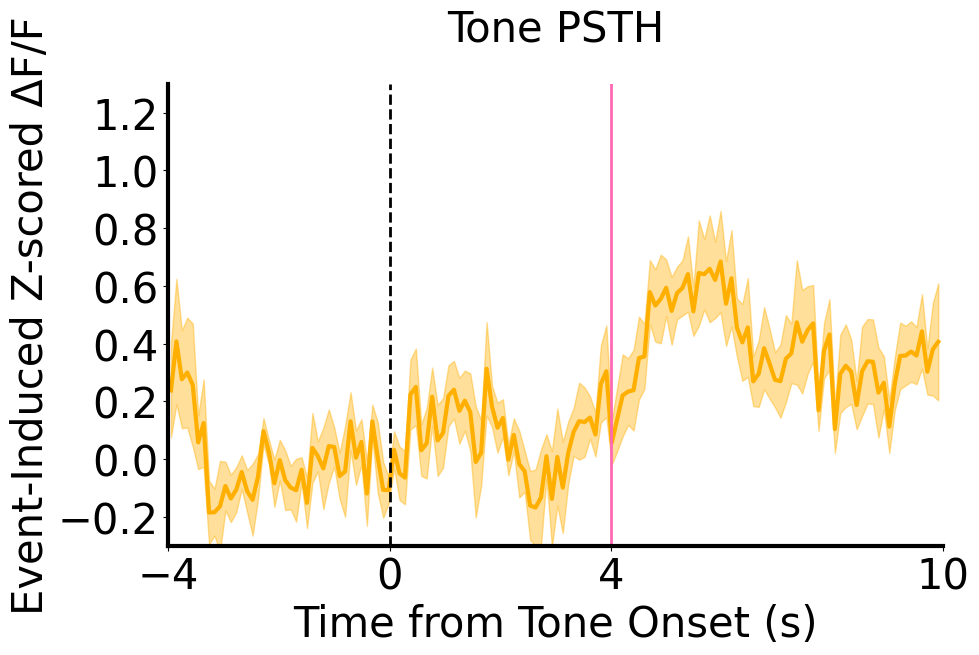

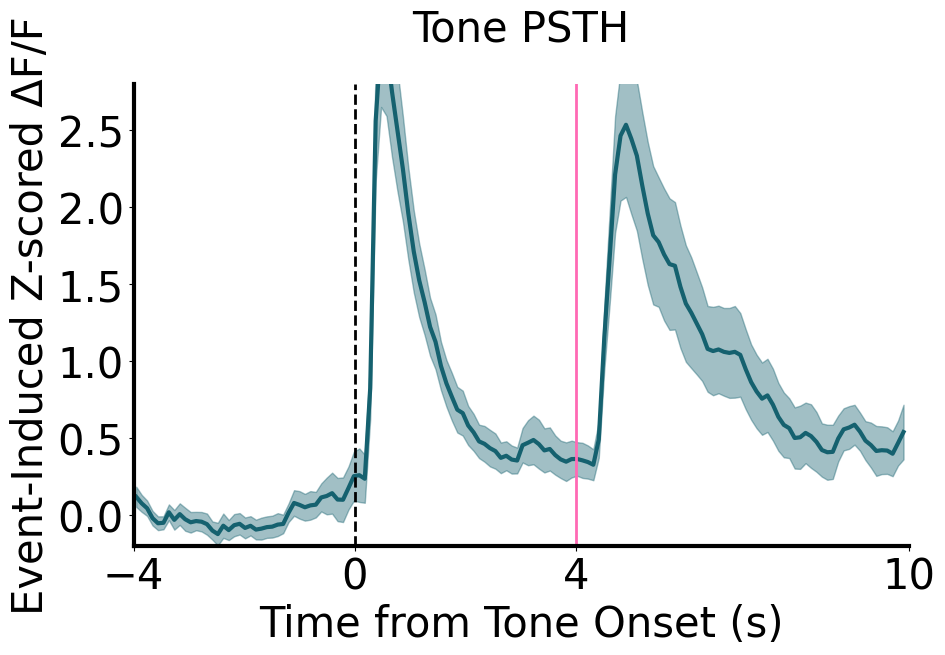

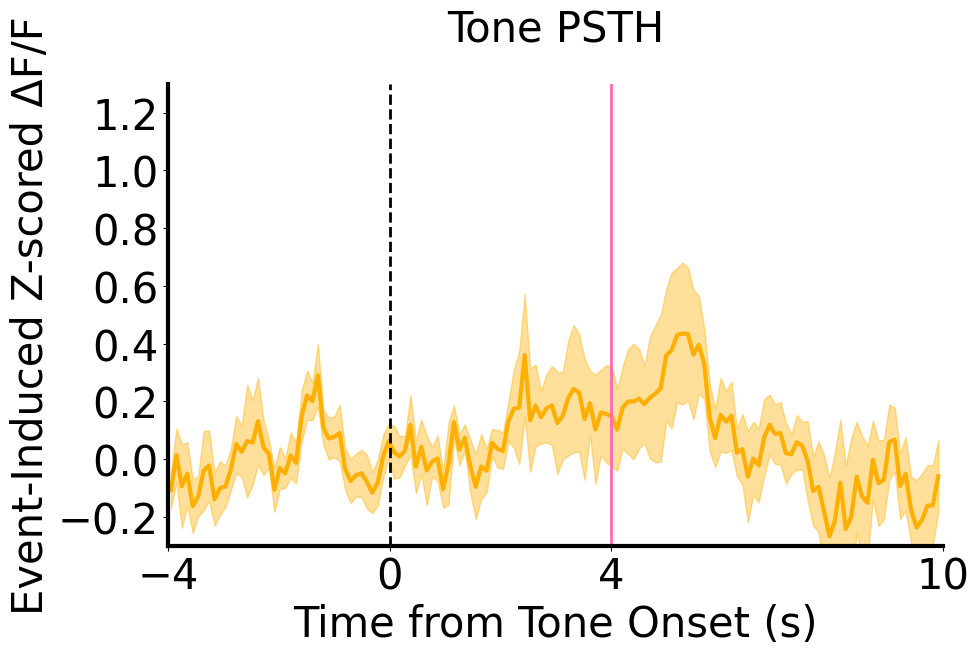

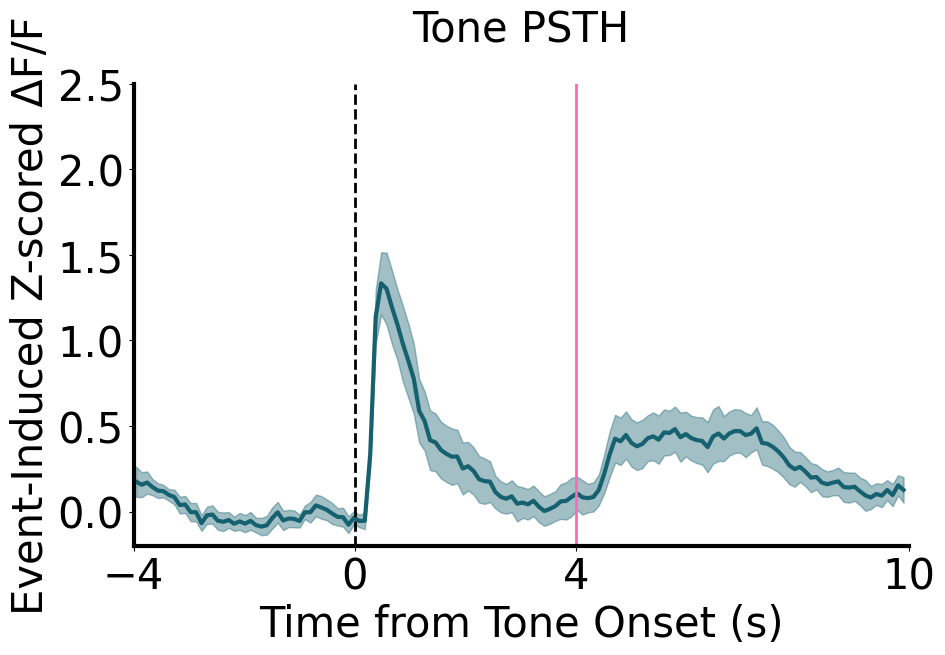

In [13]:
# Plots the mean psth for winning or losing bouts for tones
expA.plot_mean_psth(df_winningA, condition='Winning', event_type='Tone', directory_path=directory_path4, brain_region='mPFC', y_min=-0.3, y_max=1.3)
expA.plot_mean_psth(df_winningA, condition='Winning', event_type='Tone', directory_path=directory_path4, brain_region='NAc', y_min=-0.2, y_max=2.8)
expA.plot_mean_psth(df_losingA, condition='Losing', event_type='Tone', directory_path=directory_path4, brain_region='mPFC', y_min=-0.3, y_max=1.3)
expA.plot_mean_psth(df_losingA, condition='Losing', event_type='Tone', directory_path=directory_path4, brain_region='NAc', y_min=-0.2, y_max=2.5)

C

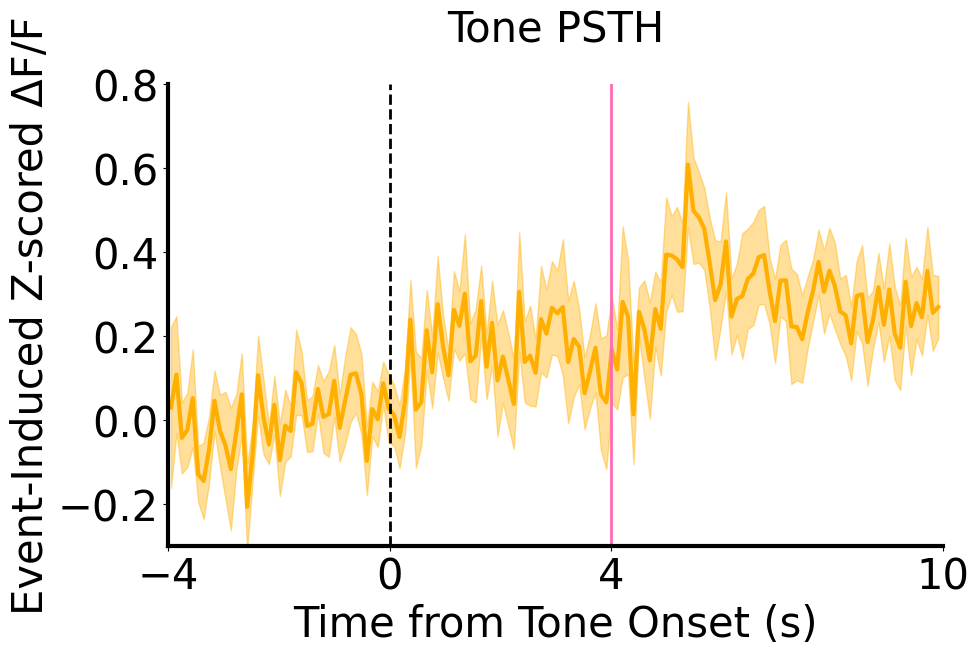

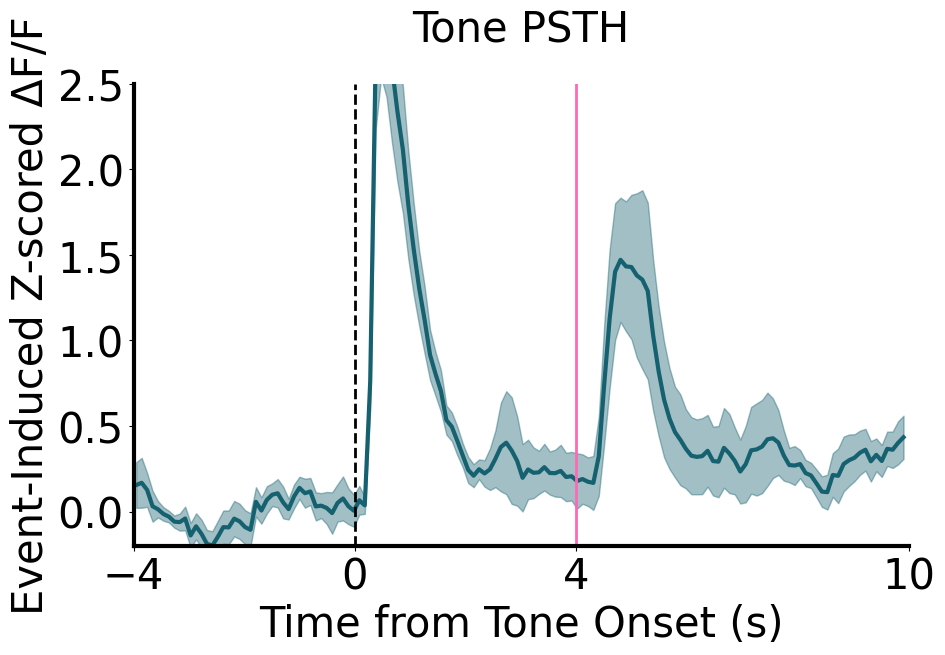

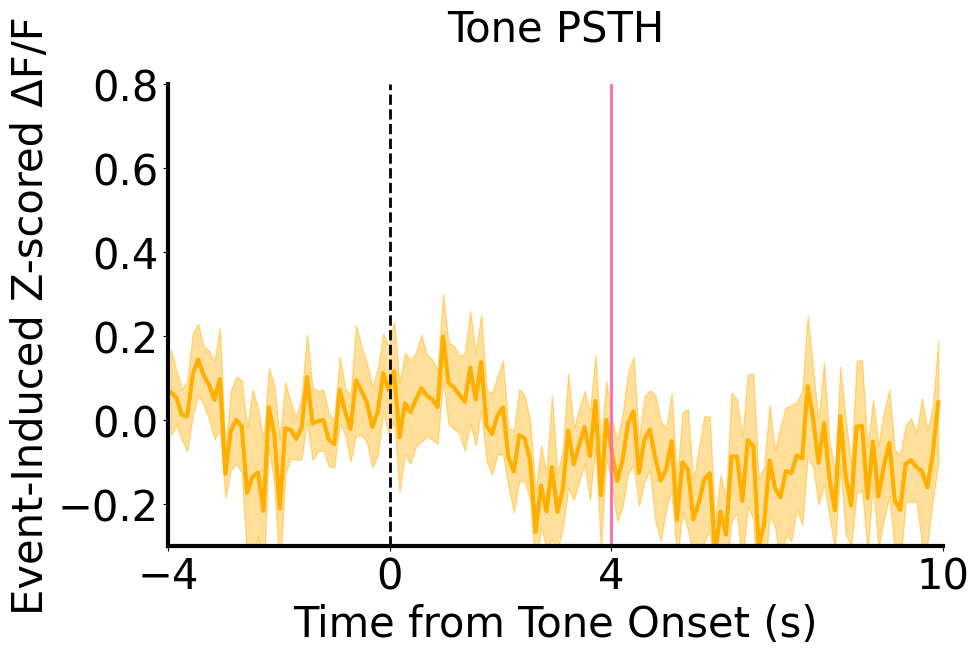

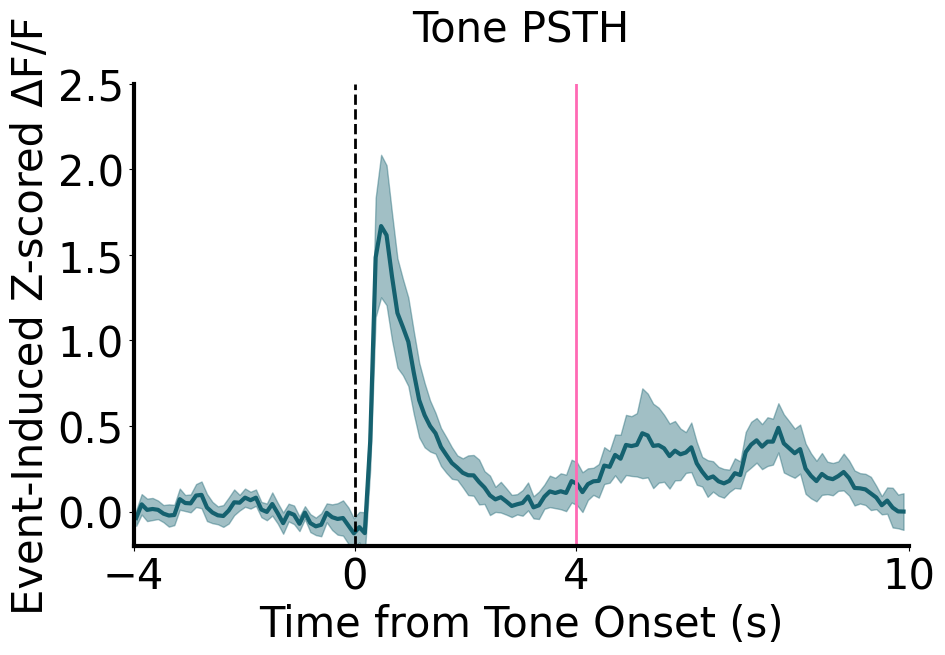

In [14]:
# Plots the mean psth for winning or losing bouts for tones
expC.plot_mean_psth(df_winningC, condition='Winning', event_type='Tone', directory_path=directory_path4, brain_region='mPFC', y_min=-0.3, y_max=0.8)
expC.plot_mean_psth(df_winningC, condition='Winning', event_type='Tone', directory_path=directory_path4, brain_region='NAc', y_min=-0.2, y_max=2.5)
expC.plot_mean_psth(df_losingC, condition='Losing', event_type='Tone', directory_path=directory_path4, brain_region='mPFC', y_min=-0.3, y_max=0.8)
expC.plot_mean_psth(df_losingC, condition='Losing', event_type='Tone', directory_path=directory_path4, brain_region='NAc', y_min=-0.2, y_max=2.5)

## PSTH of Losing Trials

In [15]:
# Plots the PSTH of either the first or last bout of loss

# Plots the PSTH of the first losing bout
"""exp.plot_single_psth(df_losing, condition='losing', event_type='Tone', directory_path=directory_path4, brain_region='mPFC', y_min=1, y_max=-0.5, plot_first=True, plot_win=False)
exp.plot_single_psth(df_losing, condition='losing', event_type='Tone', directory_path=directory_path4, brain_region='NAc', y_min=3.5, y_max=-0.5, plot_first=True, plot_win=False)"""

# Plots the PSTH of the last losing bout
"""exp.plot_single_psth(df_losing, condition='losing', event_type='Tone', directory_path=directory_path4, brain_region='mPFC', y_min=1, y_max=-0.5, plot_first=False, plot_win=False)
exp.plot_single_psth(df_losing, condition='losing', event_type='Tone', directory_path=directory_path4, brain_region='NAc', y_min=3.5, y_max=-0.5, plot_first=False, plot_win=False)"""

"exp.plot_single_psth(df_losing, condition='losing', event_type='Tone', directory_path=directory_path4, brain_region='mPFC', y_min=1, y_max=-0.5, plot_first=False, plot_win=False)\nexp.plot_single_psth(df_losing, condition='losing', event_type='Tone', directory_path=directory_path4, brain_region='NAc', y_min=3.5, y_max=-0.5, plot_first=False, plot_win=False)"

## PSTH of winning trials First and Last tone|

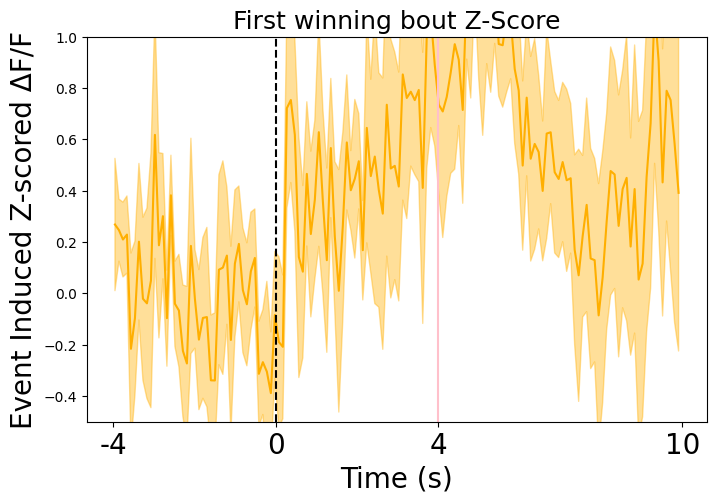

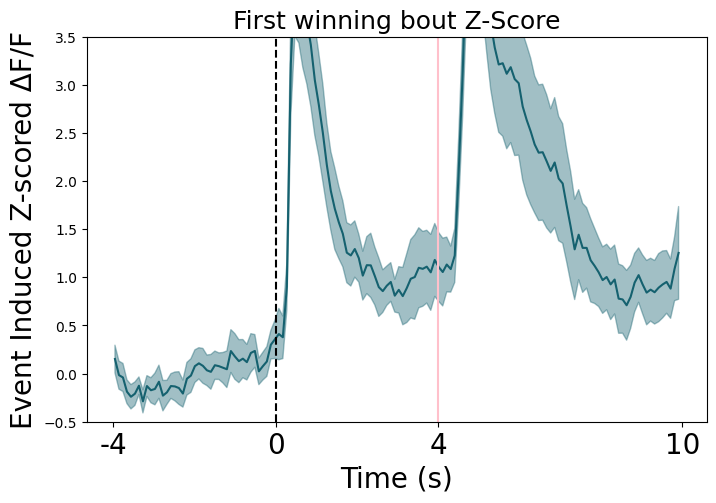

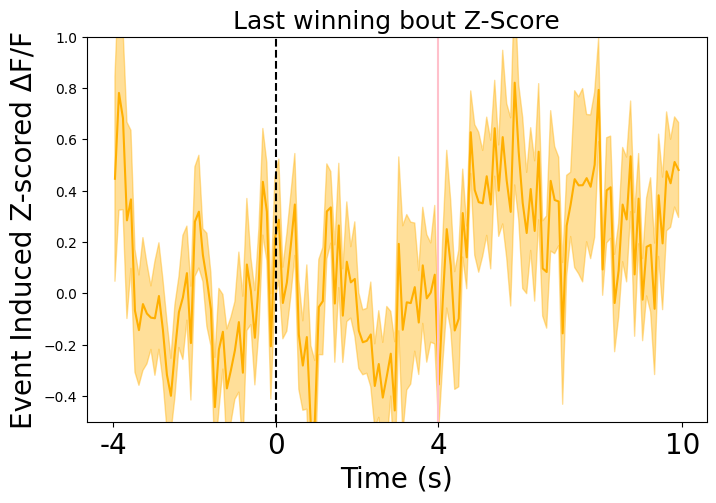

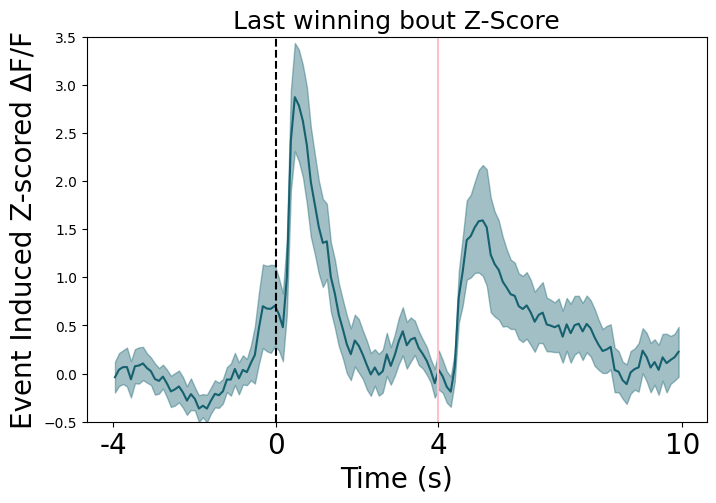

In [16]:
# Plots the PSTH of either the first or last bout of win

# Plots the PSTH of the first winning bout
expA.plot_single_psth(df_winningA, condition='winning', event_type='Tone', directory_path=None, brain_region='mPFC', y_min=1, y_max=-0.5, plot_first=True)
expA.plot_single_psth(df_winningA, condition='winning', event_type='Tone', directory_path=None, brain_region='NAc', y_min=3.5, y_max=-0.5, plot_first=True)
# Plots the PSTH of the last winning bout
expA.plot_single_psth(df_winningA, condition='winning', event_type='Tone', directory_path=None, brain_region='mPFC', y_min=1, y_max=-0.5, plot_first=False)
expA.plot_single_psth(df_winningA, condition='winning', event_type='Tone', directory_path=None, brain_region='NAc', y_min=3.5, y_max=-0.5, plot_first=False)

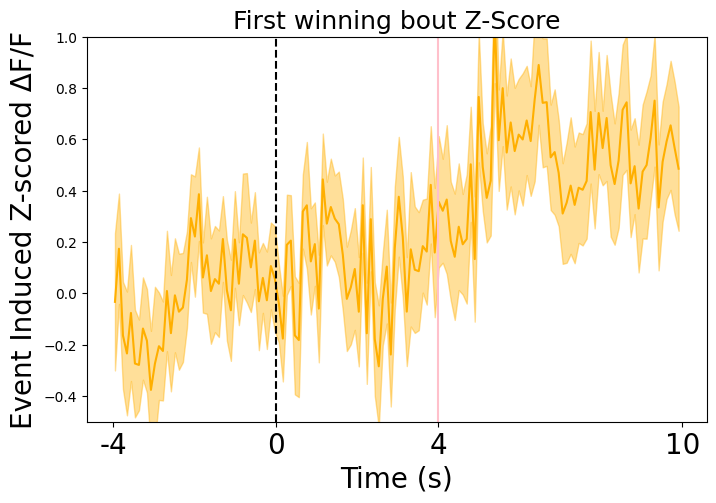

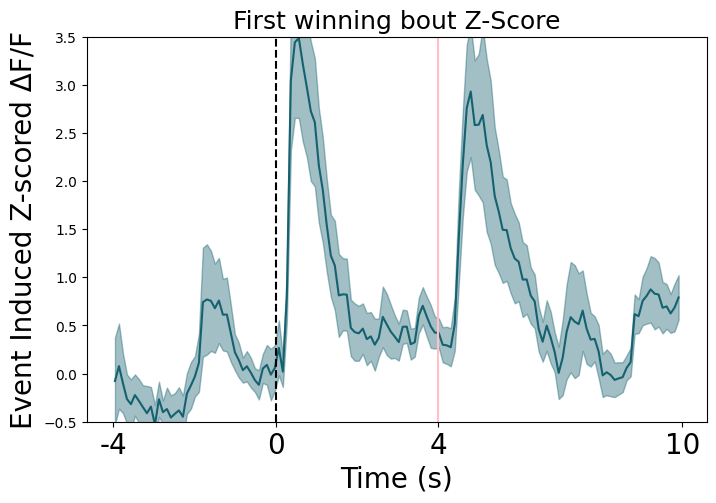

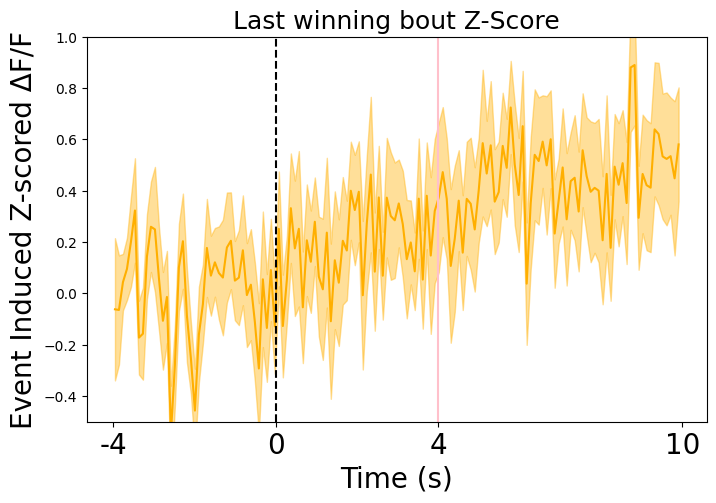

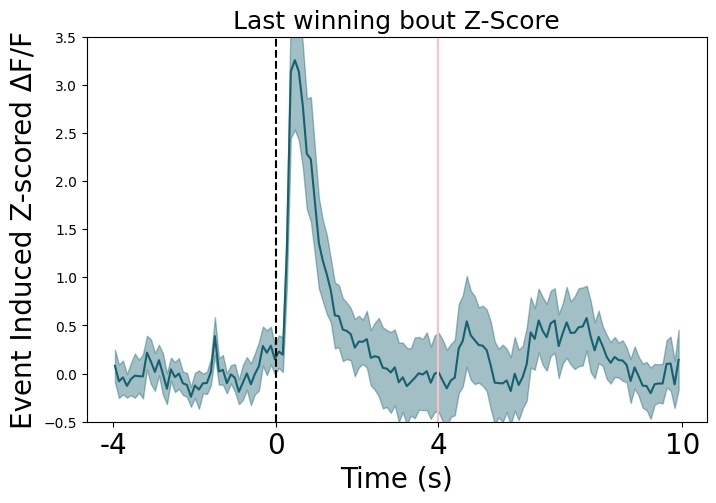

In [17]:
# Plots the PSTH of either the first or last bout of win

# Plots the PSTH of the first winning bout
expC.plot_single_psth(df_winningC, condition='winning', event_type='Tone', directory_path=None, brain_region='mPFC', y_min=1, y_max=-0.5, plot_first=True)
expC.plot_single_psth(df_winningC, condition='winning', event_type='Tone', directory_path=None, brain_region='NAc', y_min=3.5, y_max=-0.5, plot_first=True)
# Plots the PSTH of the last winning bout
expC.plot_single_psth(df_winningC, condition='winning', event_type='Tone', directory_path=None, brain_region='mPFC', y_min=1, y_max=-0.5, plot_first=False)
expC.plot_single_psth(df_winningC, condition='winning', event_type='Tone', directory_path=None, brain_region='NAc', y_min=3.5, y_max=-0.5, plot_first=False)

## Heat Maps Tones

In [18]:
# Plots tone response for first and last wins and loses as heatmaps instead of PSTHs
"""exp.plot_single_trial_heatmaps(df_winning, 'win', 'Tone', directory_path5, 'mPFC')
exp.plot_single_trial_heatmaps(df_losing, 'lose', 'Tone', directory_path5, 'mPFC')
exp.plot_single_trial_heatmaps(df_winning, 'win', 'Tone', directory_path5, 'NAc')
exp.plot_single_trial_heatmaps(df_losing, 'lose', 'Tone', directory_path5, 'NAc')"""

"exp.plot_single_trial_heatmaps(df_winning, 'win', 'Tone', directory_path5, 'mPFC')\nexp.plot_single_trial_heatmaps(df_losing, 'lose', 'Tone', directory_path5, 'mPFC')\nexp.plot_single_trial_heatmaps(df_winning, 'win', 'Tone', directory_path5, 'NAc')\nexp.plot_single_trial_heatmaps(df_losing, 'lose', 'Tone', directory_path5, 'NAc')"

## Heat Maps Licks

In [19]:
# Plots lick response for first and last wins and loses as heatmaps instead of PSTHs
"""exp.plot_single_trial_heatmaps(df_winning, 'win', 'Lick', directory_path7, 'mPFC')
exp.plot_single_trial_heatmaps(df_losing, 'lose', 'Lick', directory_path7, 'mPFC')
exp.plot_single_trial_heatmaps(df_winning, 'win', 'Lick', directory_path7, 'NAc')
exp.plot_single_trial_heatmaps(df_losing, 'lose', 'Lick', directory_path7, 'NAc')"""

"exp.plot_single_trial_heatmaps(df_winning, 'win', 'Lick', directory_path7, 'mPFC')\nexp.plot_single_trial_heatmaps(df_losing, 'lose', 'Lick', directory_path7, 'mPFC')\nexp.plot_single_trial_heatmaps(df_winning, 'win', 'Lick', directory_path7, 'NAc')\nexp.plot_single_trial_heatmaps(df_losing, 'lose', 'Lick', directory_path7, 'NAc')"

## First Tone PSTHs

[DEBUG] PSTH: Plotting Tone event index 1 (0-indexed 0) for brain region NAc
[DEBUG] Row 0, subject nn5: trace shape (14242,), first 5 values: [-0.77837663 -0.77840192 -0.78045308 -0.78221951 -0.78370675]
[DEBUG] Row 1, subject nn1: trace shape (14242,), first 5 values: [0.52349396 0.52374542 0.52528544 0.52680415 0.5283105 ]
[DEBUG] Row 2, subject nn6: trace shape (14242,), first 5 values: [0.51764954 0.51746434 0.51715902 0.51675111 0.5162432 ]
[DEBUG] Row 3, subject nn4: trace shape (14242,), first 5 values: [0.45247864 0.46447199 0.4790027  0.49359065 0.5082064 ]
[DEBUG] Row 4, subject nn1: trace shape (14242,), first 5 values: [0.71368945 0.71596382 0.72023409 0.72432786 0.72824824]
[DEBUG] Row 6, subject nn5: trace shape (14242,), first 5 values: [0.12248652 0.12417261 0.13451779 0.14512042 0.15599156]
[DEBUG] Row 8, subject nn7: trace shape (14242,), first 5 values: [-0.29819476 -0.30034096 -0.30265575 -0.30512068 -0.30773471]
[DEBUG] Row 9, subject nn2: trace shape (14242,), fi

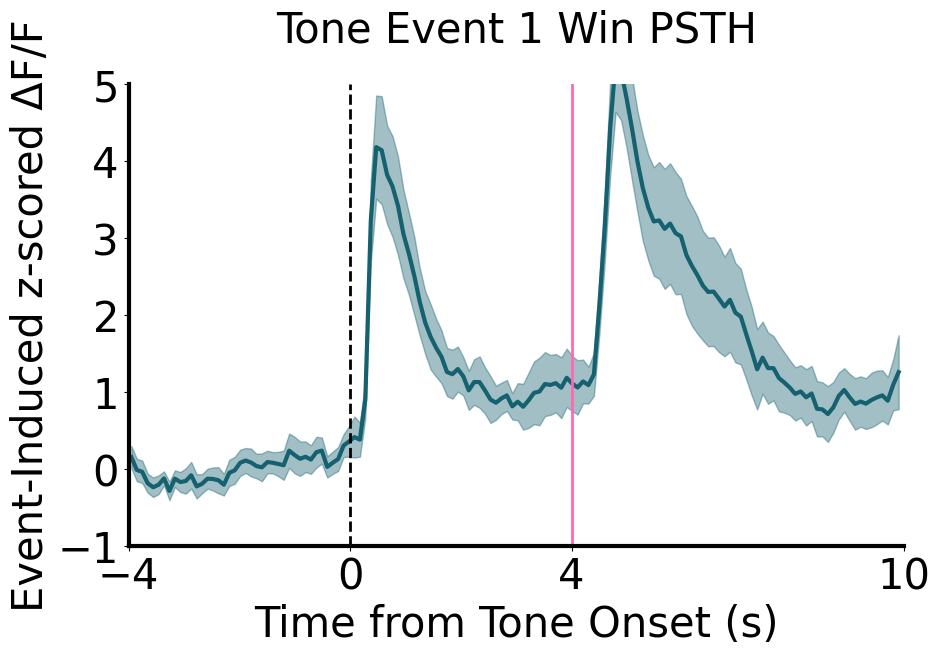

[DEBUG] PSTH: Plotting Tone event index 1 (0-indexed 0) for brain region NAc
[DEBUG] Row 0, subject nn5: trace shape (14242,), first 5 values: [0.69541714 0.70003388 0.70547417 0.71073819 0.71583904]
[DEBUG] Row 1, subject nn1: trace shape (14242,), first 5 values: [0.66666297 0.6663219  0.66557418 0.66471025 0.66373151]
[DEBUG] Row 2, subject nn6: trace shape (14242,), first 5 values: [-0.33947887 -0.33971743 -0.34120564 -0.34273522 -0.34429352]
[DEBUG] Row 3, subject nn4: trace shape (14242,), first 5 values: [0.54133498 0.53928031 0.53508051 0.53074943 0.52629695]
[DEBUG] Row 4, subject nn1: trace shape (14242,), first 5 values: [-0.68520194 -0.68565458 -0.68704577 -0.68847592 -0.68995329]
[DEBUG] Row 6, subject nn5: trace shape (14242,), first 5 values: [0.56739091 0.56060253 0.55039822 0.54026972 0.53021117]
[DEBUG] Row 8, subject nn7: trace shape (14242,), first 5 values: [-0.01567527 -0.01763667 -0.02058065 -0.02354309 -0.02652622]
[DEBUG] Row 10, subject nn2: trace shape (14242

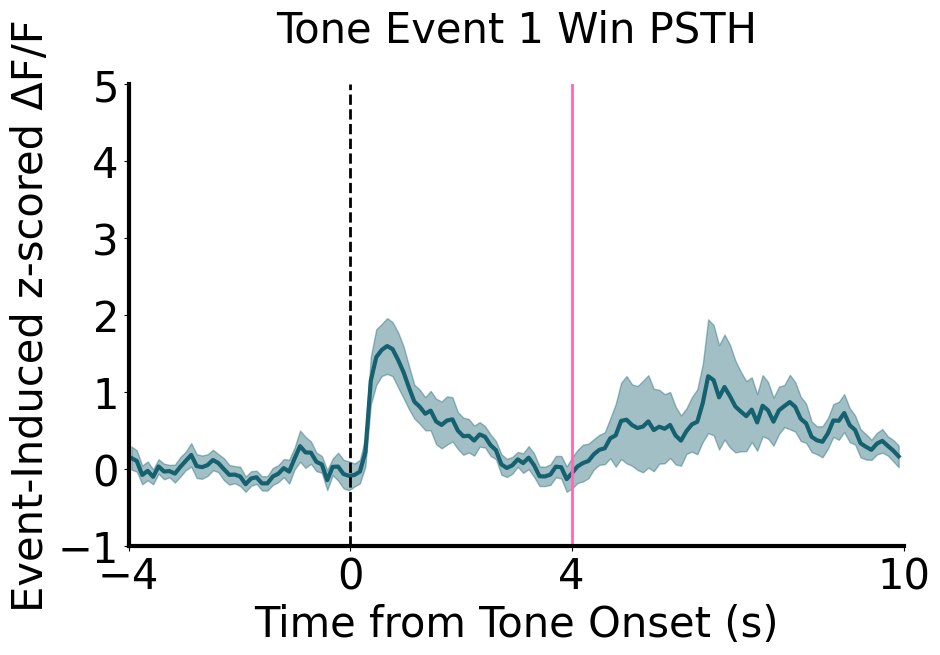

In [20]:
# Winning First tone response
expA.plot_specific_event_psth(event_type='Tone', event_index = 1, directory_path=None, brain_region='NAc', y_min=-1, y_max=5, df=df_winningA, bin_size=100)

# Losing First Tone Response
expA.plot_specific_event_psth(event_type='Tone', event_index = 1, directory_path=None, brain_region='NAc', y_min=-1, y_max=5, df=df_losingA, bin_size=100)

[DEBUG] PSTH: Plotting Tone event index 1 (0-indexed 0) for brain region NAc
[DEBUG] Row 1, subject nn3: trace shape (14242,), first 5 values: [-0.1139676  -0.11784131 -0.12580961 -0.13403303 -0.14247152]
[DEBUG] Row 2, subject nn7: trace shape (14242,), first 5 values: [-0.13060027 -0.13098761 -0.13179303 -0.13271516 -0.13376429]
[DEBUG] Row 6, subject nn8: trace shape (14242,), first 5 values: [-1.88147218 -1.88643437 -1.89391648 -1.90137823 -1.90882161]
[DEBUG] Row 9, subject nn6: trace shape (14242,), first 5 values: [-0.07872763 -0.07789466 -0.07716634 -0.07653945 -0.07601958]
[DEBUG] Row 12, subject nn5: trace shape (14242,), first 5 values: [-0.54924421 -0.54791312 -0.53954668 -0.53059732 -0.52106701]
[DEBUG] Row 16, subject nn7: trace shape (14242,), first 5 values: [2.47617539 2.48051916 2.48931282 2.49818054 2.50712116]
[DEBUG] Row 17, subject nn3: trace shape (14242,), first 5 values: [-1.11172577 -1.11102764 -1.10666857 -1.1021548  -1.09748829]
[DEBUG] Row 20, subject nn4: 

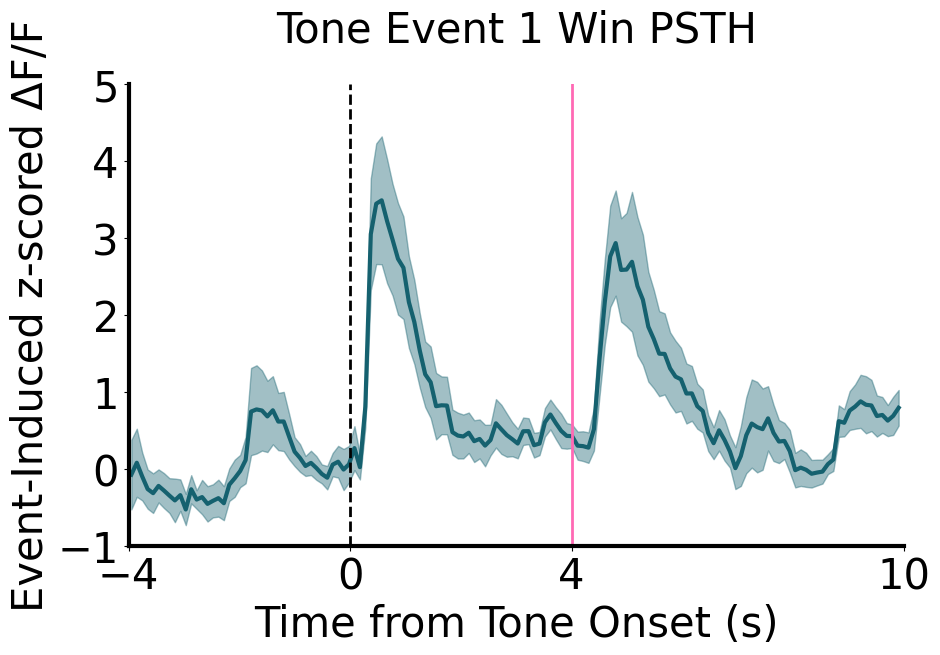

[DEBUG] PSTH: Plotting Tone event index 1 (0-indexed 0) for brain region NAc
[DEBUG] Row 1, subject nn3: trace shape (14242,), first 5 values: [0.02877549 0.02873933 0.02852084 0.02832516 0.02815917]
[DEBUG] Row 2, subject nn7: trace shape (14242,), first 5 values: [2.76015952 2.75910138 2.75254186 2.74604573 2.73961469]
[DEBUG] Row 6, subject nn8: trace shape (14242,), first 5 values: [-0.07412313 -0.07481009 -0.07858598 -0.08234354 -0.08609245]
[DEBUG] Row 9, subject nn6: trace shape (14242,), first 5 values: [0.8544303  0.85723946 0.86147377 0.8656754  0.86984316]
[DEBUG] Row 10, subject nn1: trace shape (14242,), first 5 values: [-0.23623684 -0.2371713  -0.24006346 -0.24308186 -0.24623357]
[DEBUG] Row 13, subject nn5: trace shape (14242,), first 5 values: [-0.96296221 -0.96234252 -0.96137525 -0.96036909 -0.95933633]
[DEBUG] Row 17, subject nn7: trace shape (14242,), first 5 values: [-0.35240224 -0.34704761 -0.34145758 -0.33567753 -0.32969815]
[DEBUG] Row 18, subject nn3: trace shap

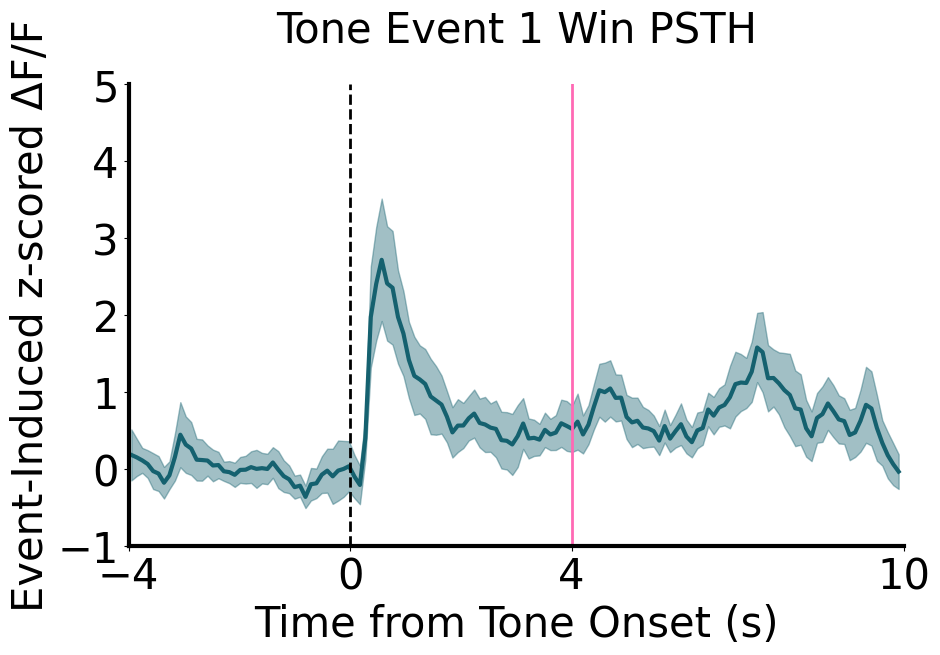

In [21]:
# Winning First tone response
expC.plot_specific_event_psth(event_type='Tone', event_index = 1, directory_path=None, brain_region='NAc', y_min=-1, y_max=5, df=df_winningC, bin_size=100)

# Losing First Tone Response
expC.plot_specific_event_psth(event_type='Tone', event_index = 1, directory_path=None, brain_region='NAc', y_min=-1, y_max=5, df=df_losingC, bin_size=100)

## Finding Means

In [22]:
print(df_winningA.columns)
expA.drop_unnecessary(df_winningA)
expA.drop_unnecessary(df_losingA)
df_win1A = expA.find_overall_mean(df_winningA)
df_lose1A = expA.find_overall_mean(df_losingA)

Index(['file name', 'subject', 'trial', 'sound cues', 'port entries',
       'sound cues onset', 'port entries onset', 'port entries offset',
       'subject_name', 'winner_array', 'first_value', 'first_tone',
       'first_bout', 'filtered_winner_array', 'filtered_sound_cues',
       'filtered_port_entries', 'filtered_port_entry_offset',
       'first_lick_after_sound_cue', 'closest_lick_offset', 'DS', 'Cage',
       'Rank', 'Tone Event_Time_Axis', 'Tone Event_Zscore',
       'Lick Event_Time_Axis', 'Lick Event_Zscore', 'Mean Tone Event_Zscore',
       'Mean Lick Event_Zscore', 'Tone AUC', 'Tone Max Peak',
       'Tone Time of Max Peak', 'Tone Mean Z-score', 'Tone Adjusted End',
       'Lick AUC', 'Lick Max Peak', 'Lick Time of Max Peak',
       'Lick Mean Z-score', 'Lick Adjusted End', 'Tone Mean Z-score EI',
       'Tone AUC EI', 'Tone Max Peak EI', 'Tone Time of Max Peak EI',
       'Lick Mean Z-score EI', 'Lick AUC EI', 'Lick Max Peak EI',
       'Lick Time of Max Peak EI', 'Lick 

In [23]:
print(df_winningC.columns)
expC.drop_unnecessary(df_winningC)
expC.drop_unnecessary(df_losingC)
df_win1C = expC.find_overall_mean(df_winningC)
df_lose1C = expC.find_overall_mean(df_losingC)

Index(['file name', 'subject', 'trial', 'sound cues', 'port entries',
       'sound cues onset', 'port entries onset', 'port entries offset',
       'subject_name', 'winner_array', 'first_value', 'first_tone',
       'first_bout', 'filtered_winner_array', 'filtered_sound_cues',
       'filtered_port_entries', 'filtered_port_entry_offset',
       'first_lick_after_sound_cue', 'closest_lick_offset', 'DS', 'Cage',
       'Rank', 'Tone Event_Time_Axis', 'Tone Event_Zscore',
       'Lick Event_Time_Axis', 'Lick Event_Zscore', 'Mean Tone Event_Zscore',
       'Mean Lick Event_Zscore', 'Tone AUC', 'Tone Max Peak',
       'Tone Time of Max Peak', 'Tone Mean Z-score', 'Tone Adjusted End',
       'Lick AUC', 'Lick Max Peak', 'Lick Time of Max Peak',
       'Lick Mean Z-score', 'Lick Adjusted End', 'Tone Mean Z-score EI',
       'Tone AUC EI', 'Tone Max Peak EI', 'Tone Time of Max Peak EI',
       'Lick Mean Z-score EI', 'Lick AUC EI', 'Lick Max Peak EI',
       'Lick Time of Max Peak EI', 'Lick 

## Heat maps of winning and losing for all subjects

In [24]:
# Each row represents a separate subject

exp.plot_mean_per_row_heatmaps(df_win1, 'win', 'Tone', directory_path8, 'mPFC')
exp.plot_mean_per_row_heatmaps(df_lose1, 'lose', 'Tone', directory_path8, 'mPFC')
exp.plot_mean_per_row_heatmaps(df_win1, 'win', 'Tone', directory_path8, 'NAc')
exp.plot_mean_per_row_heatmaps(df_lose1, 'lose', 'Tone', directory_path8, 'NAc')

NameError: name 'exp' is not defined

In [ ]:
exp = Reward_Competition(experiment_folder_path=experiment_path, behavior_folder_path=None)

Found Synapse note file: C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined_Cohorts\Reward_Competition\combined_cohorts\n6-240912-062009\Notes.txt
read from t=0s to t=2073.36s
Found Synapse note file: C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined_Cohorts\Reward_Competition\combined_cohorts\n6-240913-062437\Notes.txt
read from t=0s to t=2044.96s
Found Synapse note file: C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined_Cohorts\Reward_Competition\combined_cohorts\n6-240914-065650\Notes.txt
read from t=0s to t=2047.26s
Found Synapse note file: C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined_Cohorts\Reward_Competition\combined_cohorts\n6-240914-095611\Notes.txt
read from t=0s to t=2053.26s
Found Synapse note file: C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined_Cohorts\Reward_Competition\combined_cohorts\n7-240912-095235\Notes.txt
read from t=0s to t=1955.86s
Found Synapse note file: C:\Users\alber\

    Lick AUC EI
0     -3.082607
1      2.274554
2      1.511753
3      5.484946
4      1.688340
5      0.029209
6      1.930643
7      0.844740
8      2.653352
9      3.461458
10     3.028308
    Lick AUC EI
0      0.308967
1     -0.770028
2      1.367374
3      1.694376
4      0.070656
5      0.043525
6      0.760243
7      1.007618
8      2.019221
9      1.141851
10     1.521598
Index(['Lick AUC EI'], dtype='object')
Processing column: Lick AUC EI
df: 0    -3.082607
1     2.274554
2     1.511753
3     5.484946
4     1.688340
5     0.029209
6     1.930643
7     0.844740
8     2.653352
9     3.461458
10    3.028308
Name: Lick AUC EI, dtype: float64
df1: 0     0.308967
1    -0.770028
2     1.367374
3     1.694376
4     0.070656
5     0.043525
6     0.760243
7     1.007618
8     2.019221
9     1.141851
10    1.521598
Name: Lick AUC EI, dtype: float64
T-test for Lick AUC EI and Lick AUC EI: t=1.384, p=1.896e-01


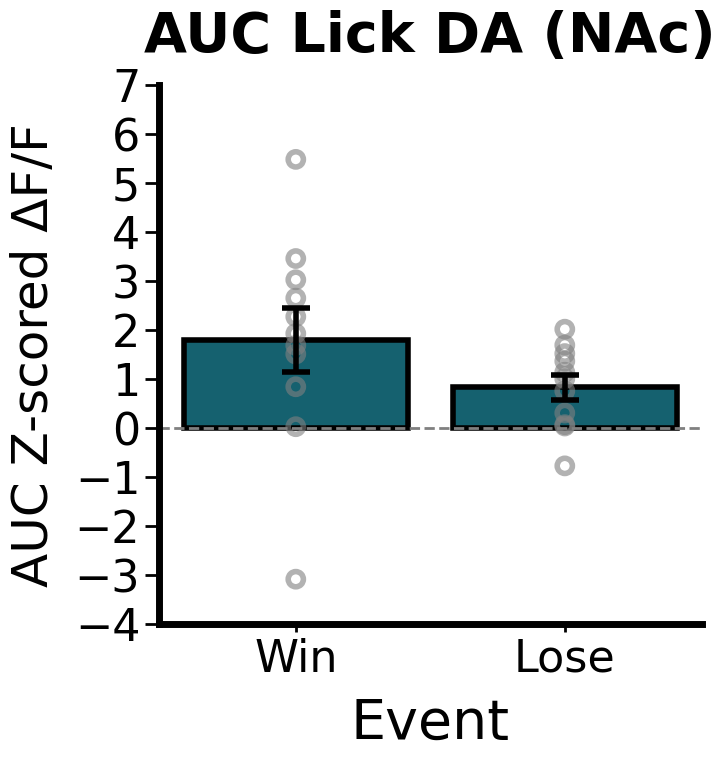

    Lick AUC EI
11     0.822598
12     1.238544
13     0.541748
14     0.389076
15     1.665559
16     1.473251
17     0.903667
18     1.421519
19     2.099883
20     1.031509
21     0.405111
22     1.692344
23     1.489848
24     1.073469
25     0.873451
    Lick AUC EI
11     0.772222
12     0.903895
13     0.637969
14     0.596524
15    -0.110183
16     0.203810
17    -0.303042
18    -0.522310
19     0.271236
20    -2.279512
21    -0.394483
22     0.209637
23    -0.378031
24     1.508936
25    -0.489694
Index(['Lick AUC EI'], dtype='object')
Processing column: Lick AUC EI
df: 11    0.822598
12    1.238544
13    0.541748
14    0.389076
15    1.665559
16    1.473251
17    0.903667
18    1.421519
19    2.099883
20    1.031509
21    0.405111
22    1.692344
23    1.489848
24    1.073469
25    0.873451
Name: Lick AUC EI, dtype: float64
df1: 11    0.772222
12    0.903895
13    0.637969
14    0.596524
15   -0.110183
16    0.203810
17   -0.303042
18   -0.522310
19    0.271236
20   -2.279512


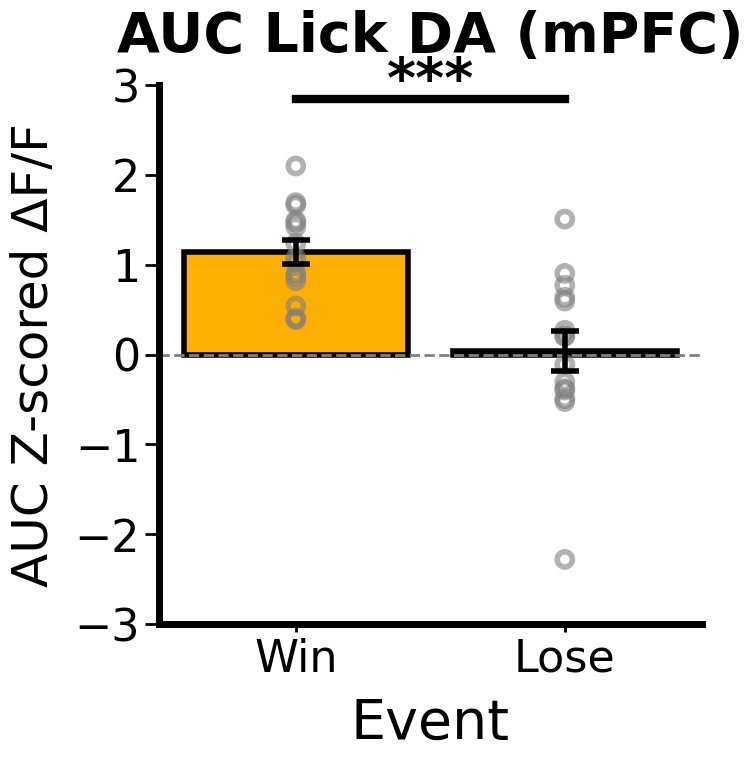

    Tone AUC EI
0     -0.375708
1      0.218515
2     -0.001563
3      2.392522
4      1.964850
5      4.061324
6      2.637756
7      4.306227
8      4.676153
9      4.569442
10     3.730133
    Tone AUC EI
0      1.935625
1     -1.332873
2     -0.025990
3      1.706946
4      0.116297
5      1.115717
6      0.294514
7      1.587460
8      1.300114
9      1.789541
10     3.897271
Index(['Tone AUC EI'], dtype='object')
Processing column: Tone AUC EI
df: 0    -0.375708
1     0.218515
2    -0.001563
3     2.392522
4     1.964850
5     4.061324
6     2.637756
7     4.306227
8     4.676153
9     4.569442
10    3.730133
Name: Tone AUC EI, dtype: float64
df1: 0     1.935625
1    -1.332873
2    -0.025990
3     1.706946
4     0.116297
5     1.115717
6     0.294514
7     1.587460
8     1.300114
9     1.789541
10    3.897271
Name: Tone AUC EI, dtype: float64
T-test for Tone AUC EI and Tone AUC EI: t=2.037, p=5.660e-02


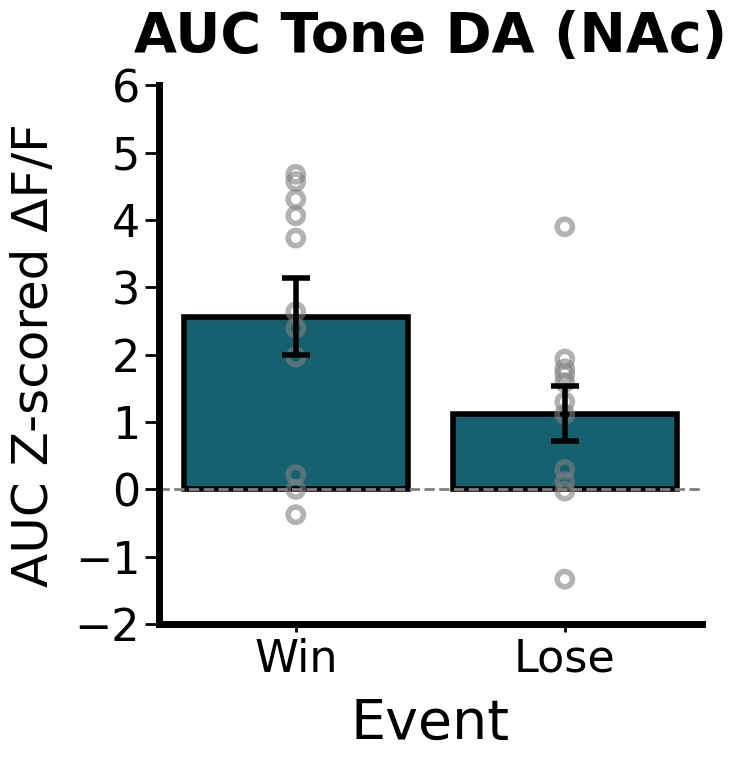

    Tone AUC EI
11     0.298515
12    -0.190139
13     0.114678
14    -0.106836
15     1.827303
16    -0.597828
17    -0.060144
18     0.658947
19     0.966555
20     0.578270
21     0.405884
22     0.206999
23     0.767973
24     0.131182
25     0.607789
    Tone AUC EI
11     0.203915
12    -0.015887
13     0.346235
14     0.353503
15    -0.036443
16    -0.272124
17     0.041183
18    -0.458908
19     0.173190
20    -0.127568
21    -0.812375
22     0.058972
23     0.313842
24     1.055315
25     0.154470
Index(['Tone AUC EI'], dtype='object')
Processing column: Tone AUC EI
df: 11    0.298515
12   -0.190139
13    0.114678
14   -0.106836
15    1.827303
16   -0.597828
17   -0.060144
18    0.658947
19    0.966555
20    0.578270
21    0.405884
22    0.206999
23    0.767973
24    0.131182
25    0.607789
Name: Tone AUC EI, dtype: float64
df1: 11    0.203915
12   -0.015887
13    0.346235
14    0.353503
15   -0.036443
16   -0.272124
17    0.041183
18   -0.458908
19    0.173190
20   -0.127568


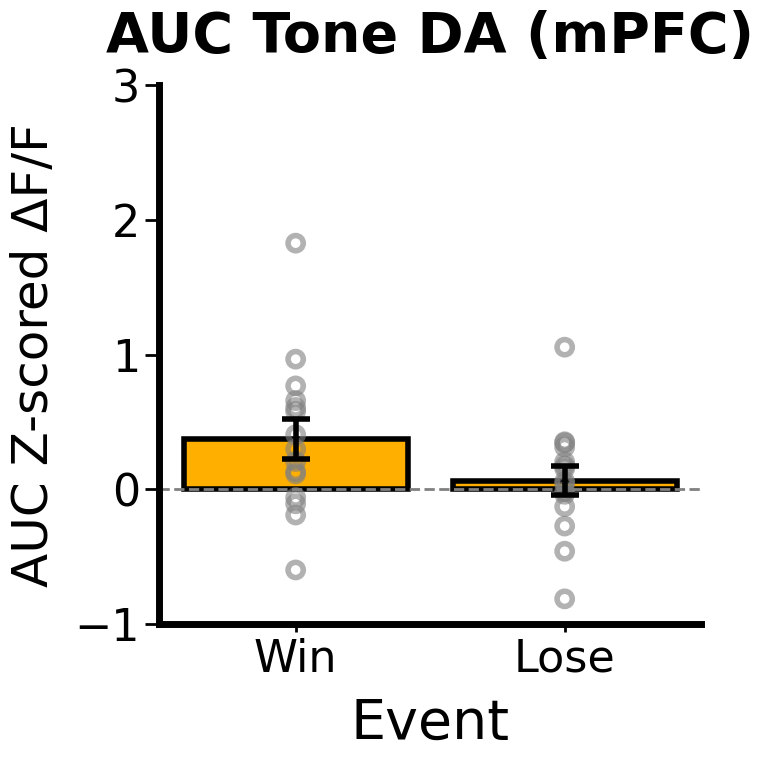

    Lick Max Peak EI
0          -0.252806
1           1.162734
2           1.449057
3           2.515121
4           1.062747
5           0.622156
6           0.904949
7           0.762285
8           2.534987
9           1.828182
10          1.392576
    Lick Max Peak EI
0           0.466940
1           0.602859
2           1.271268
3           1.141050
4           0.792565
5           0.735168
6           1.015220
7           0.892927
8           0.967696
9           0.797479
10          1.199158
Index(['Lick Max Peak EI'], dtype='object')
Processing column: Lick Max Peak EI
df: 0    -0.252806
1     1.162734
2     1.449057
3     2.515121
4     1.062747
5     0.622156
6     0.904949
7     0.762285
8     2.534987
9     1.828182
10    1.392576
Name: Lick Max Peak EI, dtype: float64
df1: 0     0.466940
1     0.602859
2     1.271268
3     1.141050
4     0.792565
5     0.735168
6     1.015220
7     0.892927
8     0.967696
9     0.797479
10    1.199158
Name: Lick Max Peak EI, dtype: float64

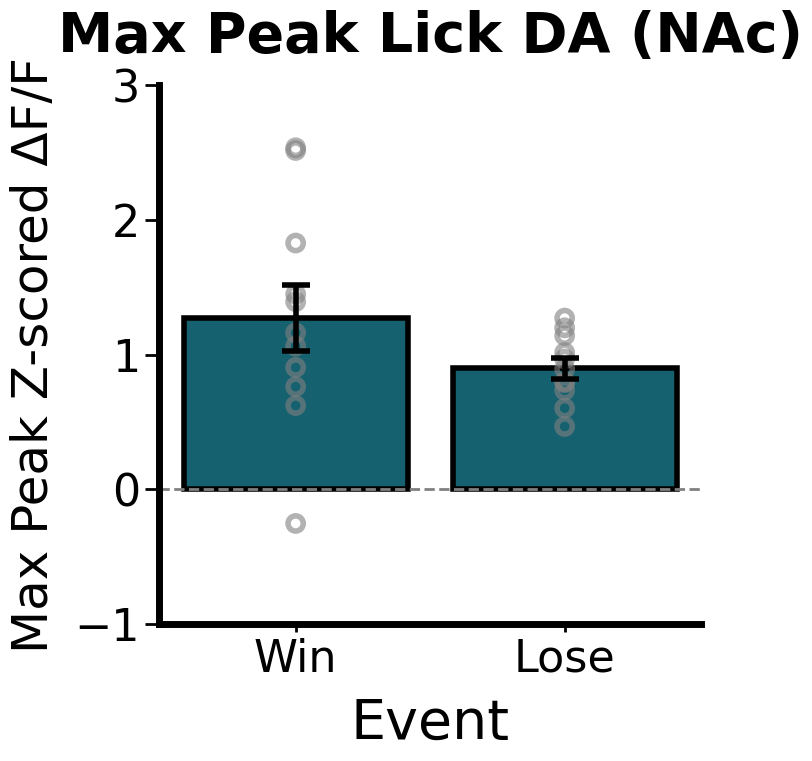

    Lick Max Peak EI
11          0.778746
12          0.922917
13          0.480084
14          0.491702
15          1.244494
16          0.743885
17          0.540929
18          0.878614
19          1.739281
20          0.648524
21          0.709475
22          0.894631
23          1.043064
24          0.863839
25          1.100413
    Lick Max Peak EI
11          0.595436
12          1.002039
13          0.592820
14          0.810428
15          0.270172
16          0.504954
17          0.258109
18          0.350311
19          0.424478
20          0.388020
21          0.695048
22          0.554029
23          0.533691
24          1.473584
25          0.364521
Index(['Lick Max Peak EI'], dtype='object')
Processing column: Lick Max Peak EI
df: 11    0.778746
12    0.922917
13    0.480084
14    0.491702
15    1.244494
16    0.743885
17    0.540929
18    0.878614
19    1.739281
20    0.648524
21    0.709475
22    0.894631
23    1.043064
24    0.863839
25    1.100413
Name: Lick Max Peak

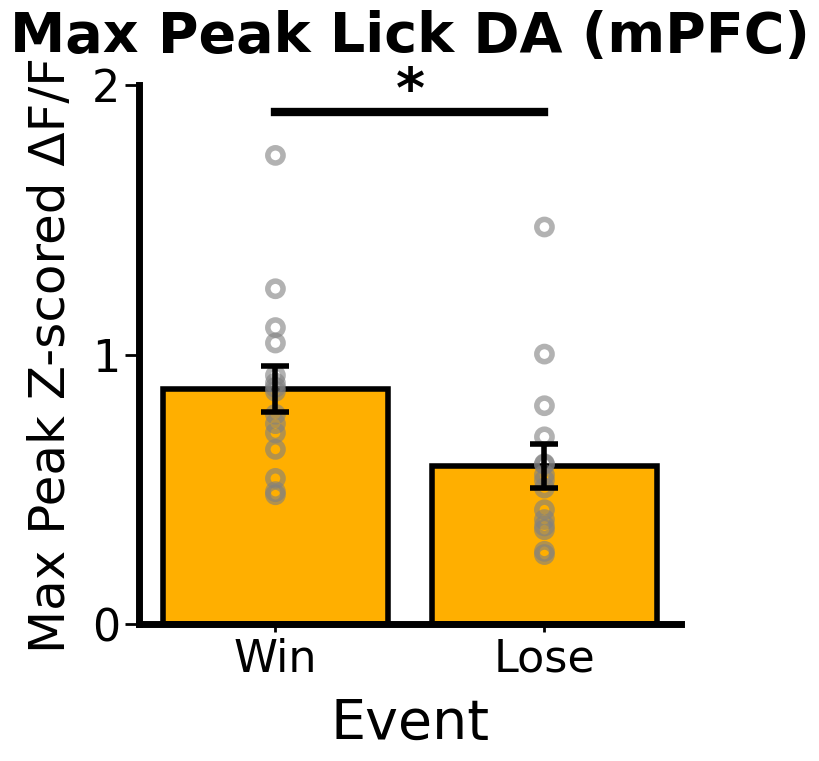

    Tone Max Peak EI
0           1.196984
1           0.574077
2           0.679824
3           1.880586
4           2.816604
5           3.942399
6           2.181421
7           3.886438
8           4.417283
9           4.510064
10          3.163807
    Tone Max Peak EI
0           1.109856
1           0.449906
2           0.472967
3           1.160743
4           1.406033
5           1.574384
6           0.750985
7           1.782979
8           1.508008
9           2.864603
10          2.563139
Index(['Tone Max Peak EI'], dtype='object')
Processing column: Tone Max Peak EI
df: 0     1.196984
1     0.574077
2     0.679824
3     1.880586
4     2.816604
5     3.942399
6     2.181421
7     3.886438
8     4.417283
9     4.510064
10    3.163807
Name: Tone Max Peak EI, dtype: float64
df1: 0     1.109856
1     0.449906
2     0.472967
3     1.160743
4     1.406033
5     1.574384
6     0.750985
7     1.782979
8     1.508008
9     2.864603
10    2.563139
Name: Tone Max Peak EI, dtype: float64

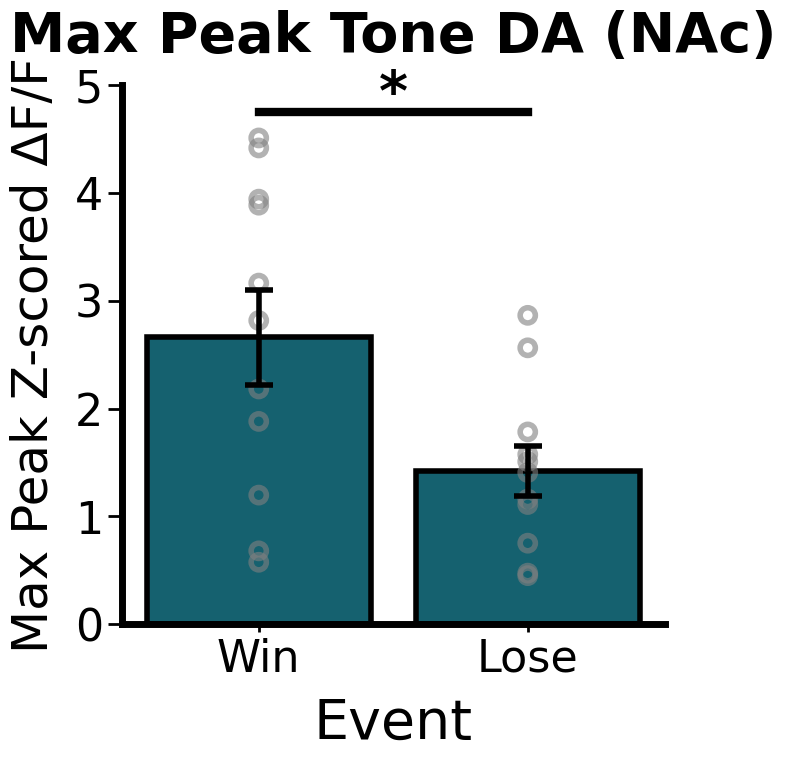

    Tone Max Peak EI
11          0.676231
12          0.497820
13          0.432332
14          0.338296
15          0.983933
16          0.223952
17          0.388548
18          0.733580
19          1.500979
20          0.657064
21          0.712002
22          0.405038
23          0.659351
24          0.534946
25          0.932201
    Tone Max Peak EI
11          0.605397
12          0.575165
13          0.583842
14          0.591285
15          0.279854
16          0.326977
17          0.301790
18          0.477569
19          0.454618
20          0.944596
21          0.476419
22          0.569514
23          0.752410
24          1.223624
25          0.541437
Index(['Tone Max Peak EI'], dtype='object')
Processing column: Tone Max Peak EI
df: 11    0.676231
12    0.497820
13    0.432332
14    0.338296
15    0.983933
16    0.223952
17    0.388548
18    0.733580
19    1.500979
20    0.657064
21    0.712002
22    0.405038
23    0.659351
24    0.534946
25    0.932201
Name: Tone Max Peak

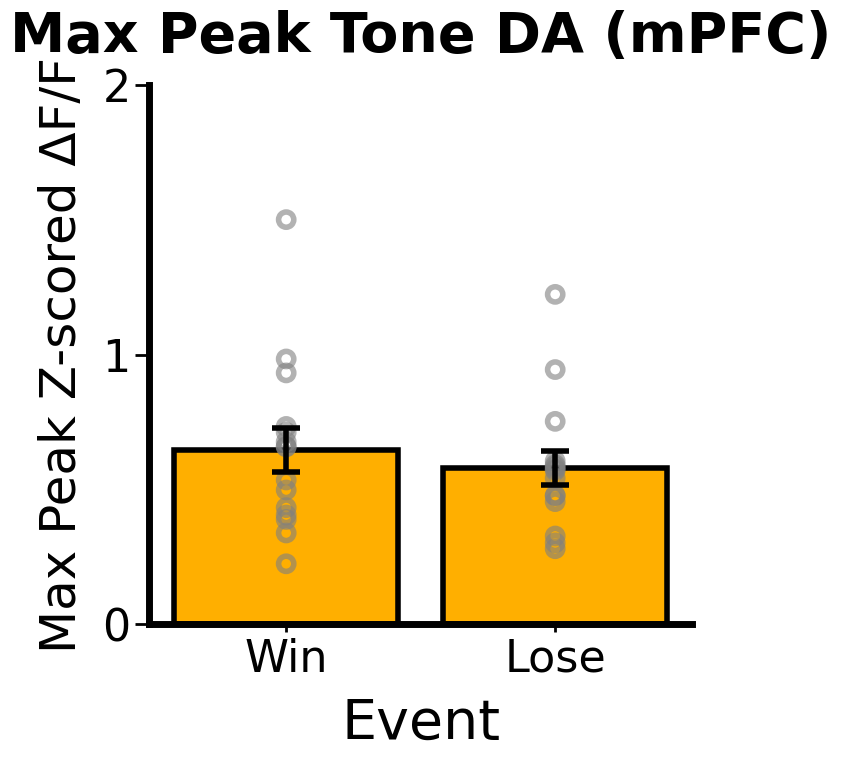

    Lick Mean Z-score EI
0              -0.770631
1               0.568637
2               0.377976
3               1.371270
4               0.422058
5               0.007331
6               0.482648
7               0.211219
8               0.663618
9               0.865385
10              0.757131
    Lick Mean Z-score EI
0               0.077254
1              -0.192470
2               0.341823
3               0.423606
4               0.017682
5               0.010901
6               0.190024
7               0.251908
8               0.504746
9               0.285456
10              0.380434
Index(['Lick Mean Z-score EI'], dtype='object')
Processing column: Lick Mean Z-score EI
df: 0    -0.770631
1     0.568637
2     0.377976
3     1.371270
4     0.422058
5     0.007331
6     0.482648
7     0.211219
8     0.663618
9     0.865385
10    0.757131
Name: Lick Mean Z-score EI, dtype: float64
df1: 0     0.077254
1    -0.192470
2     0.341823
3     0.423606
4     0.017682
5     0.010901
6    

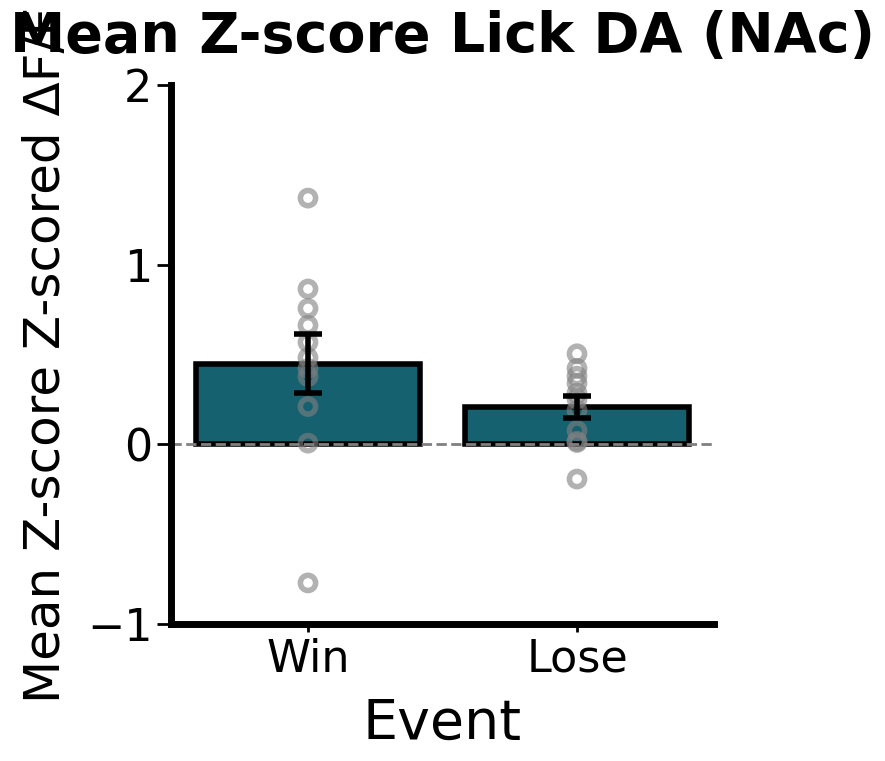

    Lick Mean Z-score EI
11              0.205650
12              0.309669
13              0.135420
14              0.097287
15              0.416430
16              0.368341
17              0.225927
18              0.355405
19              0.524973
20              0.257883
21              0.101289
22              0.423103
23              0.372434
24              0.268343
25              0.218369
    Lick Mean Z-score EI
11              0.193020
12              0.226025
13              0.159515
14              0.149129
15             -0.027550
16              0.050967
17             -0.075745
18             -0.130565
19              0.067776
20             -0.569872
21             -0.098658
22              0.052441
23             -0.094451
24              0.377199
25             -0.122436
Index(['Lick Mean Z-score EI'], dtype='object')
Processing column: Lick Mean Z-score EI
df: 11    0.205650
12    0.309669
13    0.135420
14    0.097287
15    0.416430
16    0.368341
17    0.225927
18 

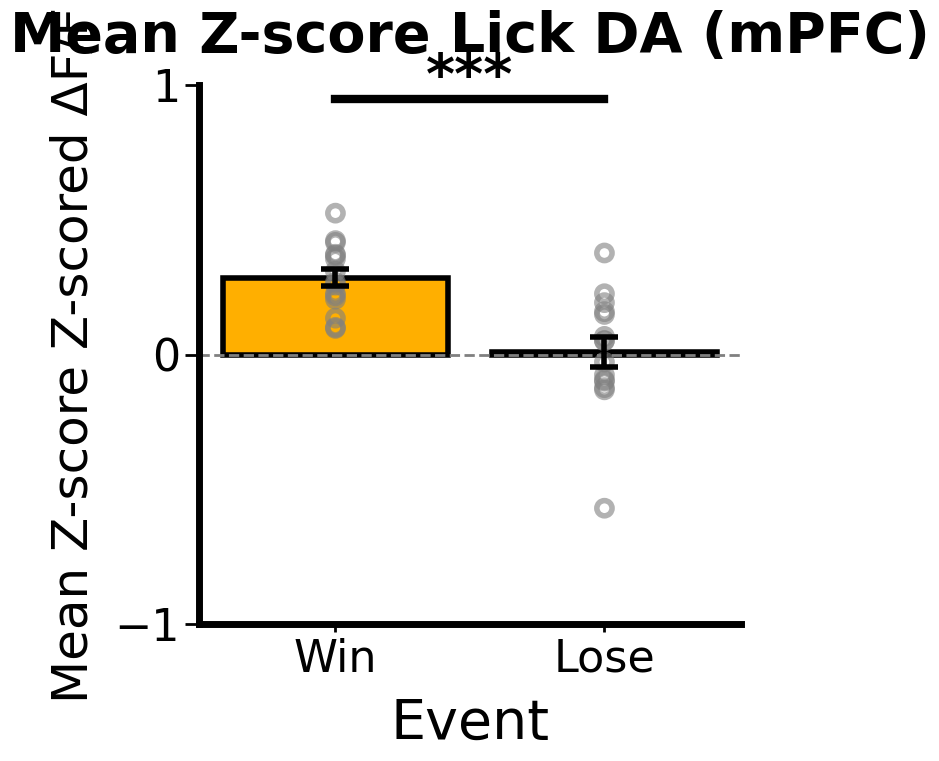

    Tone Mean Z-score EI
0              -0.093973
1               0.054668
2              -0.000364
3               0.598323
4               0.491276
5               1.015409
6               0.659446
7               1.076548
8               1.169130
9               1.142443
10              0.932559
    Tone Mean Z-score EI
0               0.483931
1              -0.333309
2              -0.006499
3               0.426780
4               0.029039
5               0.278931
6               0.073629
7               0.396866
8               0.325039
9               0.447368
10              0.974390
Index(['Tone Mean Z-score EI'], dtype='object')
Processing column: Tone Mean Z-score EI
df: 0    -0.093973
1     0.054668
2    -0.000364
3     0.598323
4     0.491276
5     1.015409
6     0.659446
7     1.076548
8     1.169130
9     1.142443
10    0.932559
Name: Tone Mean Z-score EI, dtype: float64
df1: 0     0.483931
1    -0.333309
2    -0.006499
3     0.426780
4     0.029039
5     0.278931
6    

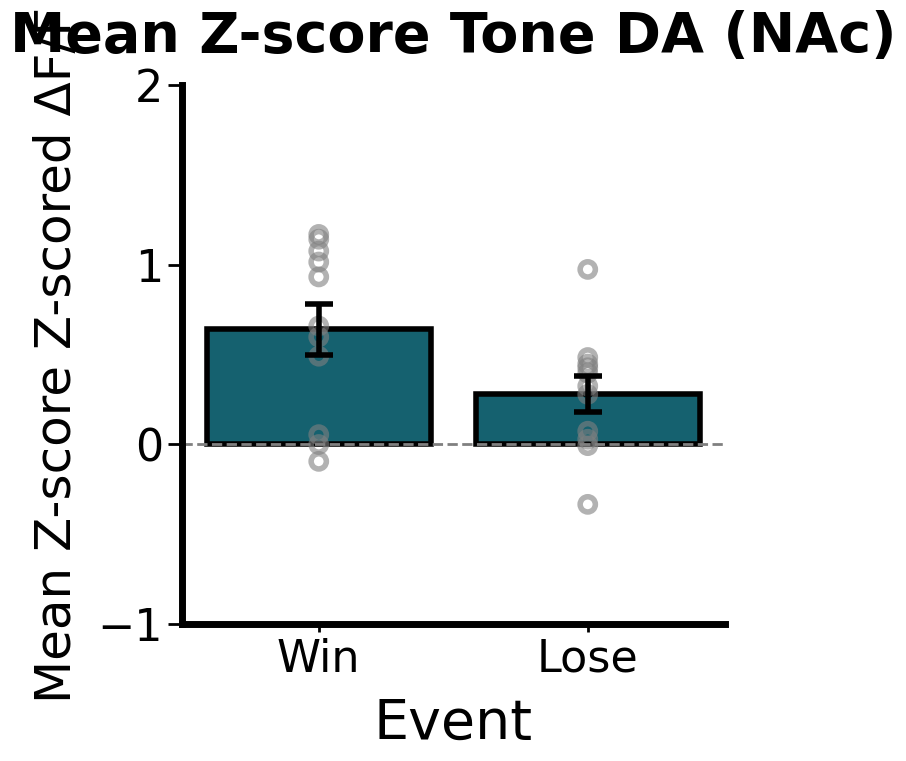

    Tone Mean Z-score EI
11              0.074632
12             -0.047548
13              0.028652
14             -0.026740
15              0.456944
16             -0.149508
17             -0.015038
18              0.164764
19              0.241701
20              0.144563
21              0.101492
22              0.051778
23              0.192029
24              0.032813
25              0.151928
    Tone Mean Z-score EI
11              0.050935
12             -0.003955
13              0.086571
14              0.088395
15             -0.009090
16             -0.068060
17              0.010310
18             -0.114746
19              0.043281
20             -0.031925
21             -0.203115
22              0.014745
23              0.078500
24              0.263947
25              0.038601
Index(['Tone Mean Z-score EI'], dtype='object')
Processing column: Tone Mean Z-score EI
df: 11    0.074632
12   -0.047548
13    0.028652
14   -0.026740
15    0.456944
16   -0.149508
17   -0.015038
18 

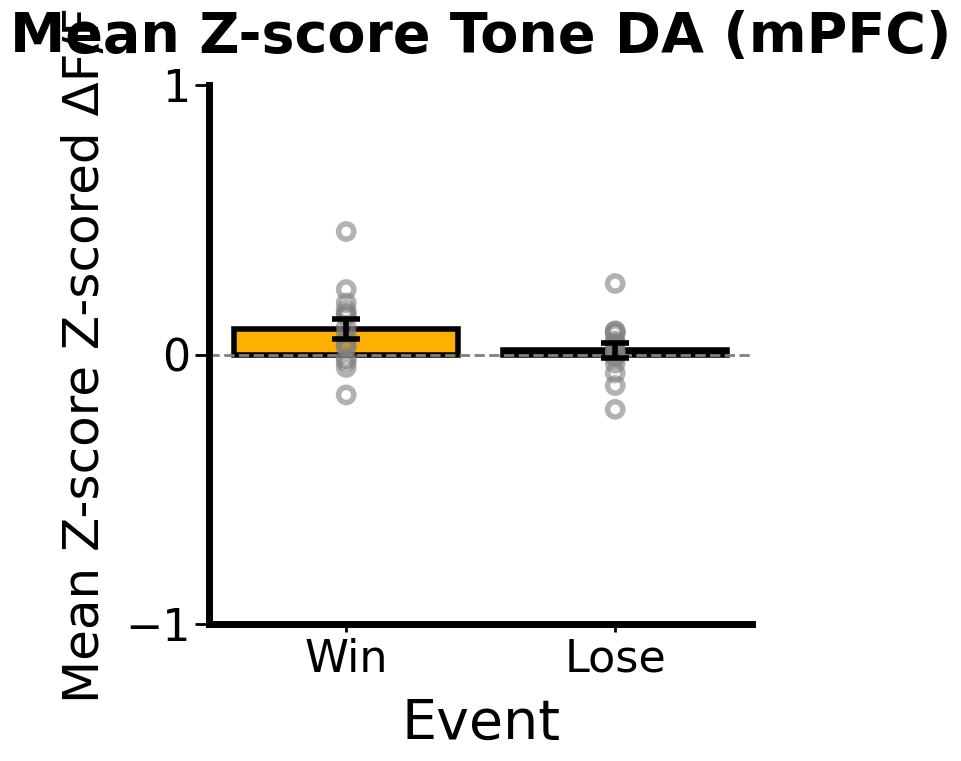

In [ ]:
# Plots win and lose da_metrics in bar plots side by side. Method can be changed for global
exp.plot_conditional(df_win1, df_lose1, method=' EI', metric_name='AUC', directory_path=directory_path2)
exp.plot_conditional(df_win1, df_lose1, method=' EI', metric_name='Max Peak', directory_path=directory_path2)
exp.plot_conditional(df_win1, df_lose1, method=' EI', metric_name='Mean Z-score', directory_path=directory_path2)

## Plots first and last win/lass bouts for Global DA

    Tone AUC First
11        1.092786
12        0.683813
13        1.390407
14       -2.432262
15       -1.261407
16       -4.062865
17        2.785367
18        0.984365
19       -0.344887
20        1.361638
21       -0.841655
22        1.016956
23        0.811898
24       -1.567192
25        0.512226
    Tone AUC Last
11       0.076177
12       2.436269
13      -2.752903
14       2.590221
15      -3.037092
16      -1.823594
17       1.021426
18      -1.199699
19       0.146643
20      -0.518851
21       0.510440
22       0.870756
23       3.056687
24      -1.794395
25       0.982865
Index(['Tone AUC First'], dtype='object')
Processing column: Tone AUC First
df: 11    1.092786
12    0.683813
13    1.390407
14   -2.432262
15   -1.261407
16   -4.062865
17    2.785367
18    0.984365
19   -0.344887
20    1.361638
21   -0.841655
22    1.016956
23    0.811898
24   -1.567192
25    0.512226
Name: Tone AUC First, dtype: float64
df1: 11    0.076177
12    2.436269
13   -2.752903
14    2.590221
1

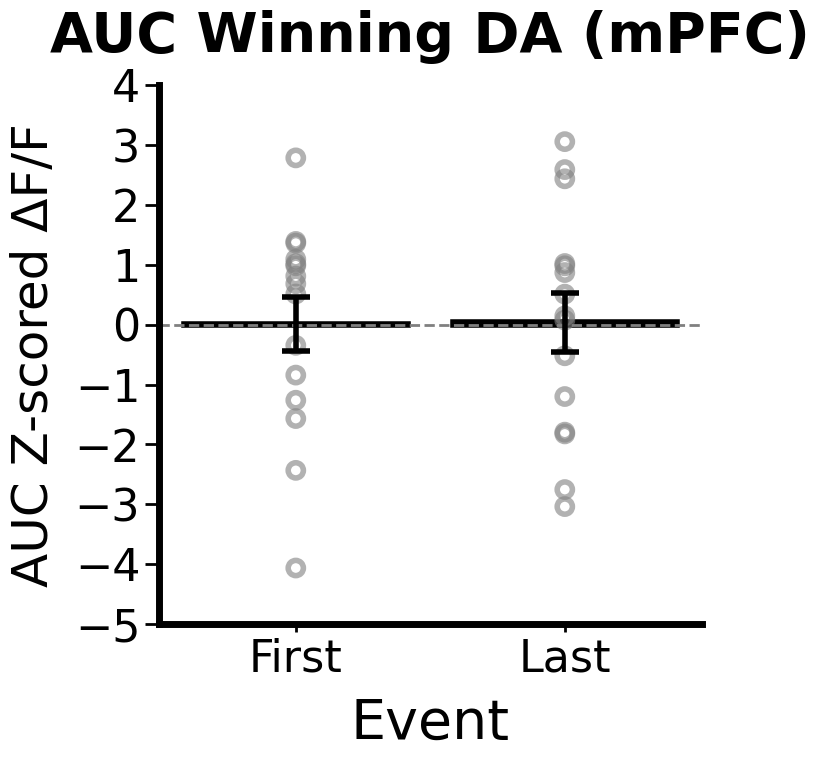

    Tone AUC First
11        2.105667
12        1.992288
13       -2.383187
14        1.898647
15        0.688156
16       -3.107753
17       -3.572182
18       -2.534416
19        0.899148
20       -0.416590
21        1.887549
22        0.044643
23        4.251883
24        1.270017
25        0.558881
    Tone AUC Last
11      -0.015759
12      -0.323638
13       2.114365
14       0.108187
15       0.177095
16       0.075818
17       1.064882
18       0.387070
19      -2.602957
20      -0.048570
21      -0.578052
22       1.437350
23       0.592411
24       1.608331
25       1.178806
Index(['Tone AUC First'], dtype='object')
Processing column: Tone AUC First
df: 11    2.105667
12    1.992288
13   -2.383187
14    1.898647
15    0.688156
16   -3.107753
17   -3.572182
18   -2.534416
19    0.899148
20   -0.416590
21    1.887549
22    0.044643
23    4.251883
24    1.270017
25    0.558881
Name: Tone AUC First, dtype: float64
df1: 11   -0.015759
12   -0.323638
13    2.114365
14    0.108187
1

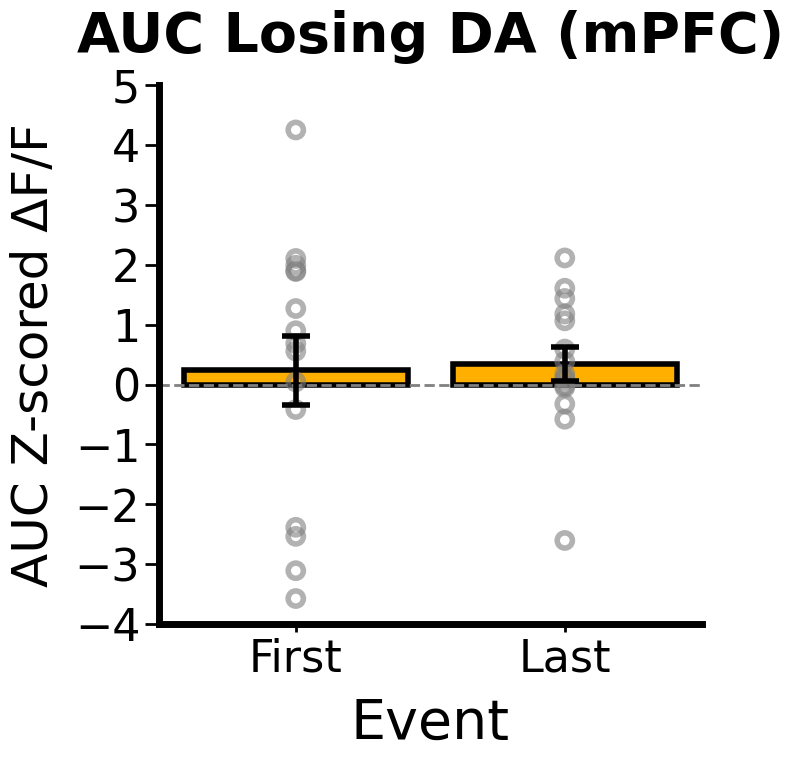

    Tone AUC First
0         1.981747
1        -0.116363
2         1.210131
3         3.287471
4         4.384301
5         5.938531
6         1.376426
7         8.692513
8         6.575658
9         4.572526
10        7.737011
    Tone AUC Last
0        3.876558
1        2.217498
2        0.995702
3        1.316375
4        2.123707
5        4.858727
6        3.296863
7        5.393599
8        3.144169
9        3.822120
10       1.906590
Index(['Tone AUC First'], dtype='object')
Processing column: Tone AUC First
df: 0     1.981747
1    -0.116363
2     1.210131
3     3.287471
4     4.384301
5     5.938531
6     1.376426
7     8.692513
8     6.575658
9     4.572526
10    7.737011
Name: Tone AUC First, dtype: float64
df1: 0     3.876558
1     2.217498
2     0.995702
3     1.316375
4     2.123707
5     4.858727
6     3.296863
7     5.393599
8     3.144169
9     3.822120
10    1.906590
Name: Tone AUC Last, dtype: float64
T-test for Tone AUC First and Tone AUC Last: t=1.192, p=2.522e-01


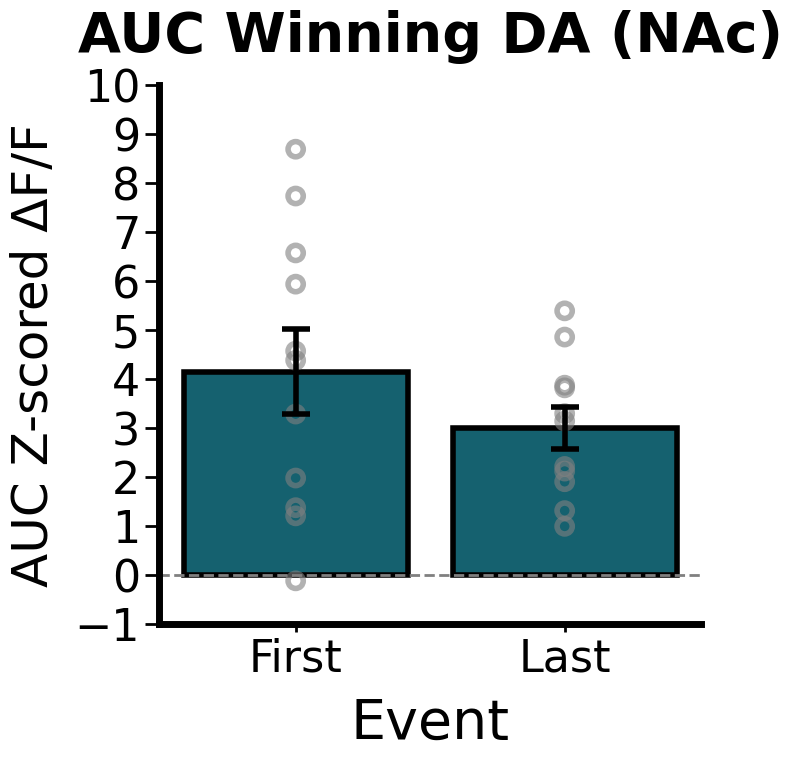

    Tone AUC First
0         1.271436
1         0.781130
2        -0.627179
3        -0.429437
4        -0.746570
5         3.072840
6        -1.166162
7         1.936166
8        -0.402999
9         5.650282
10        1.607133
    Tone AUC Last
0        0.149001
1       -1.817330
2       -0.094105
3        4.071527
4       -2.565025
5       -1.224395
6       -0.469512
7        2.500891
8       -0.373733
9       -1.143996
10       5.394497
Index(['Tone AUC First'], dtype='object')
Processing column: Tone AUC First
df: 0     1.271436
1     0.781130
2    -0.627179
3    -0.429437
4    -0.746570
5     3.072840
6    -1.166162
7     1.936166
8    -0.402999
9     5.650282
10    1.607133
Name: Tone AUC First, dtype: float64
df1: 0     0.149001
1    -1.817330
2    -0.094105
3     4.071527
4    -2.565025
5    -1.224395
6    -0.469512
7     2.500891
8    -0.373733
9    -1.143996
10    5.394497
Name: Tone AUC Last, dtype: float64
T-test for Tone AUC First and Tone AUC Last: t=0.607, p=5.511e-01


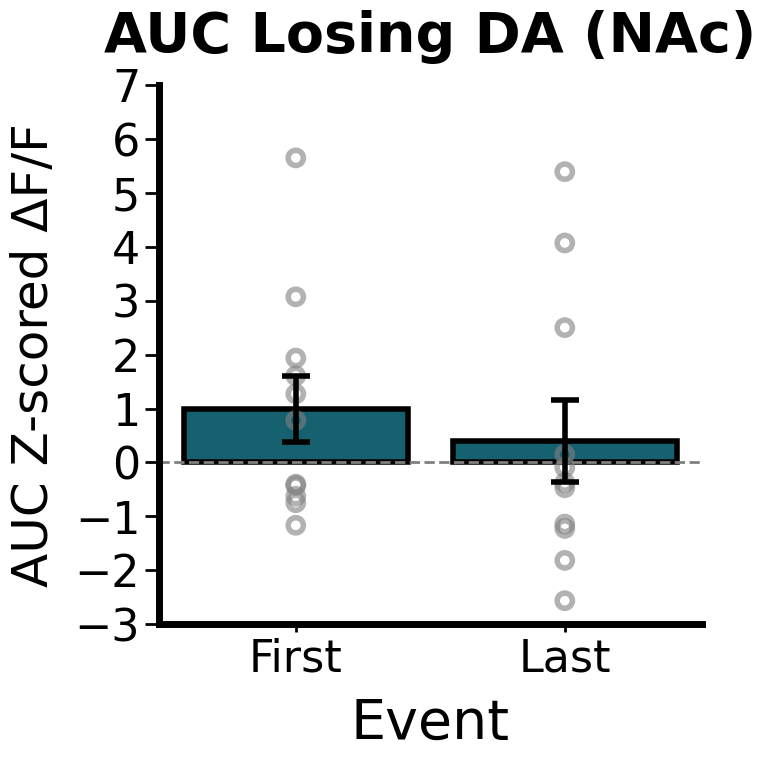

In [ ]:
# Plots bar plots of the first and last wins or loses side by side.
exp.plot_da_first_last(df_win1, metric_name='AUC', method='', directory_path=directory_path, condition="Winning", brain_region="mPFC")
exp.plot_da_first_last(df_lose1, metric_name='AUC', method='', directory_path=directory_path, condition="Losing", brain_region="mPFC")
exp.plot_da_first_last(df_win1, metric_name='AUC', method='', directory_path=directory_path, condition="Winning", brain_region="NAc")
exp.plot_da_first_last(df_lose1, metric_name='AUC', method='', directory_path=directory_path, condition="Losing", brain_region="NAc")

In [ ]:
# Same as previous but using Max Peak as metric
"""exp.plot_da_first_last(df_win, metric_name='Max Peak', method='', directory_path=directory_path, condition="Winning", brain_region="mPFC")
exp.plot_da_first_last(df_lose, metric_name='Max Peak', method='', directory_path=directory_path, condition="Losing", brain_region="mPFC")
exp.plot_da_first_last(df_win, metric_name='Max Peak', method='', directory_path=directory_path, condition="Winning", brain_region="NAc")
exp.plot_da_first_last(df_lose, metric_name='Max Peak', method='', directory_path=directory_path, condition="Losing", brain_region="NAc")"""

'exp.plot_da_first_last(df_win, metric_name=\'Max Peak\', method=\'\', directory_path=directory_path, condition="Winning", brain_region="mPFC")\nexp.plot_da_first_last(df_lose, metric_name=\'Max Peak\', method=\'\', directory_path=directory_path, condition="Losing", brain_region="mPFC")\nexp.plot_da_first_last(df_win, metric_name=\'Max Peak\', method=\'\', directory_path=directory_path, condition="Winning", brain_region="NAc")\nexp.plot_da_first_last(df_lose, metric_name=\'Max Peak\', method=\'\', directory_path=directory_path, condition="Losing", brain_region="NAc")'

In [ ]:
# Same as previous but using Mean Z-score as metric
"""exp.plot_da_first_last(df_win, metric_name='Mean Z-score', method='', directory_path=directory_path, condition="Winning", brain_region="mPFC")
exp.plot_da_first_last(df_lose, metric_name='Mean Z-score', method='', directory_path=directory_path, condition="Losing", brain_region="mPFC")
exp.plot_da_first_last(df_win, metric_name='Mean Z-score', method='', directory_path=directory_path, condition="Winning", brain_region="NAc")
exp.plot_da_first_last(df_lose, metric_name='Mean Z-score', method='', directory_path=directory_path, condition="Losing", brain_region="NAc")"""

'exp.plot_da_first_last(df_win, metric_name=\'Mean Z-score\', method=\'\', directory_path=directory_path, condition="Winning", brain_region="mPFC")\nexp.plot_da_first_last(df_lose, metric_name=\'Mean Z-score\', method=\'\', directory_path=directory_path, condition="Losing", brain_region="mPFC")\nexp.plot_da_first_last(df_win, metric_name=\'Mean Z-score\', method=\'\', directory_path=directory_path, condition="Winning", brain_region="NAc")\nexp.plot_da_first_last(df_lose, metric_name=\'Mean Z-score\', method=\'\', directory_path=directory_path, condition="Losing", brain_region="NAc")'

## Plot first and last win/loss bouts for Event Induced DA

In [ ]:
# Same as previous but using EI da metrics.
"""exp.plot_da_first_last(df_win, metric_name='AUC', method=' EI', directory_path=directory_path2, condition="Winning", brain_region="mPFC")
exp.plot_da_first_last(df_lose, metric_name='AUC', method=' EI', directory_path=directory_path2, condition="Losing", brain_region="mPFC")
exp.plot_da_first_last(df_win, metric_name='AUC', method=' EI', directory_path=directory_path2, condition="Winning", brain_region="NAc")
exp.plot_da_first_last(df_lose, metric_name='AUC', method=' EI', directory_path=directory_path2, condition="Losing", brain_region="NAc")"""

'exp.plot_da_first_last(df_win, metric_name=\'AUC\', method=\' EI\', directory_path=directory_path2, condition="Winning", brain_region="mPFC")\nexp.plot_da_first_last(df_lose, metric_name=\'AUC\', method=\' EI\', directory_path=directory_path2, condition="Losing", brain_region="mPFC")\nexp.plot_da_first_last(df_win, metric_name=\'AUC\', method=\' EI\', directory_path=directory_path2, condition="Winning", brain_region="NAc")\nexp.plot_da_first_last(df_lose, metric_name=\'AUC\', method=\' EI\', directory_path=directory_path2, condition="Losing", brain_region="NAc")'

In [ ]:
"""exp.plot_da_first_last(df_win, metric_name='Max Peak', method=' EI', directory_path=directory_path2, condition="Winning", brain_region="mPFC")
exp.plot_da_first_last(df_lose, metric_name='Max Peak', method=' EI', directory_path=directory_path2, condition="Losing", brain_region="mPFC")
exp.plot_da_first_last(df_win, metric_name='Max Peak', method=' EI', directory_path=directory_path2, condition="Winning", brain_region="NAc")
exp.plot_da_first_last(df_lose, metric_name='Max Peak', method=' EI', directory_path=directory_path2, condition="Losing", brain_region="NAc")"""

'exp.plot_da_first_last(df_win, metric_name=\'Max Peak\', method=\' EI\', directory_path=directory_path2, condition="Winning", brain_region="mPFC")\nexp.plot_da_first_last(df_lose, metric_name=\'Max Peak\', method=\' EI\', directory_path=directory_path2, condition="Losing", brain_region="mPFC")\nexp.plot_da_first_last(df_win, metric_name=\'Max Peak\', method=\' EI\', directory_path=directory_path2, condition="Winning", brain_region="NAc")\nexp.plot_da_first_last(df_lose, metric_name=\'Max Peak\', method=\' EI\', directory_path=directory_path2, condition="Losing", brain_region="NAc")'

In [ ]:
"""exp.plot_da_first_last(df_win, metric_name='Mean Z-score', method=' EI', directory_path=directory_path2, condition="Winning", brain_region="mPFC")
exp.plot_da_first_last(df_lose, metric_name='Mean Z-score', method=' EI', directory_path=directory_path2, condition="Losing", brain_region="mPFC")
exp.plot_da_first_last(df_win, metric_name='Mean Z-score', method=' EI', directory_path=directory_path2, condition="Winning", brain_region="NAc")
exp.plot_da_first_last(df_lose, metric_name='Mean Z-score', method=' EI', directory_path=directory_path2, condition="Losing", brain_region="NAc")"""

'exp.plot_da_first_last(df_win, metric_name=\'Mean Z-score\', method=\' EI\', directory_path=directory_path2, condition="Winning", brain_region="mPFC")\nexp.plot_da_first_last(df_lose, metric_name=\'Mean Z-score\', method=\' EI\', directory_path=directory_path2, condition="Losing", brain_region="mPFC")\nexp.plot_da_first_last(df_win, metric_name=\'Mean Z-score\', method=\' EI\', directory_path=directory_path2, condition="Winning", brain_region="NAc")\nexp.plot_da_first_last(df_lose, metric_name=\'Mean Z-score\', method=\' EI\', directory_path=directory_path2, condition="Losing", brain_region="NAc")'

## Scatter plots for Event Induced

0
    Rank
0      1
6      1
10     1
4      2
8      2


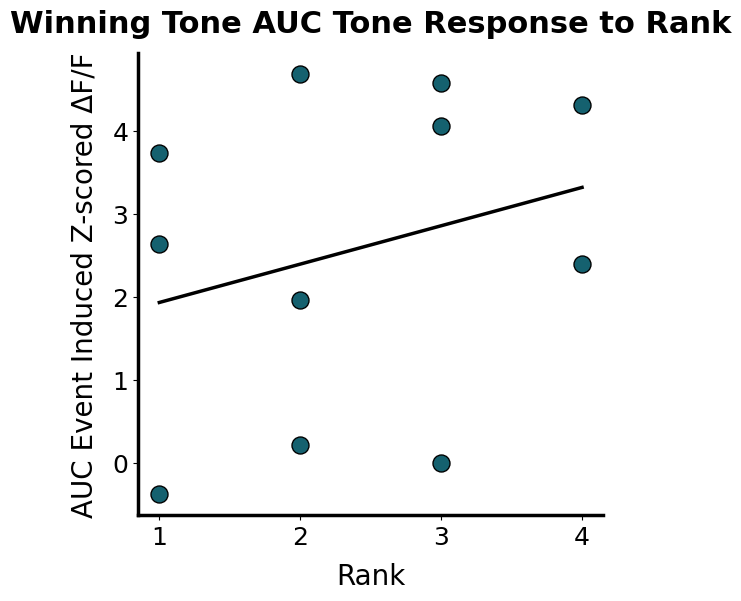

0
    Rank
12     1
16     1
24     1
20     1
21     2


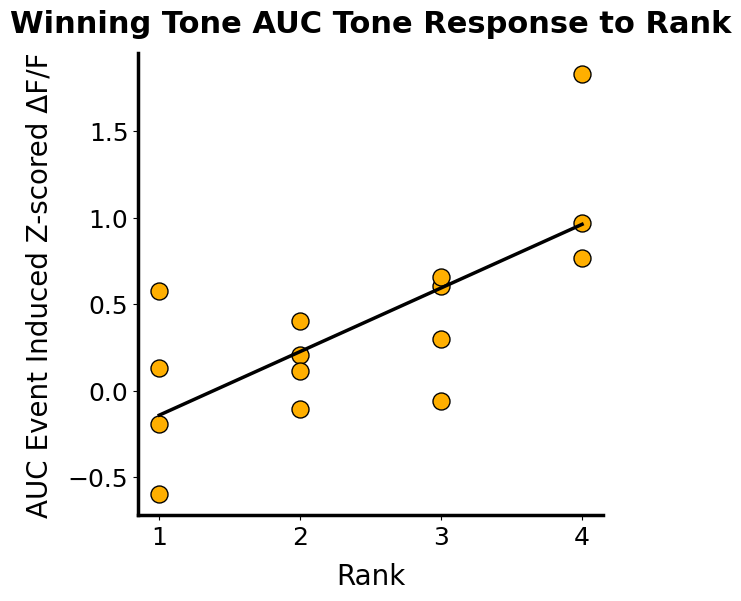

NAc: r=0.271, p=0.419, n=11
mPFC: r=0.715, p=0.003, n=15
0
    Rank
0      1
6      1
10     1
4      2
8      2


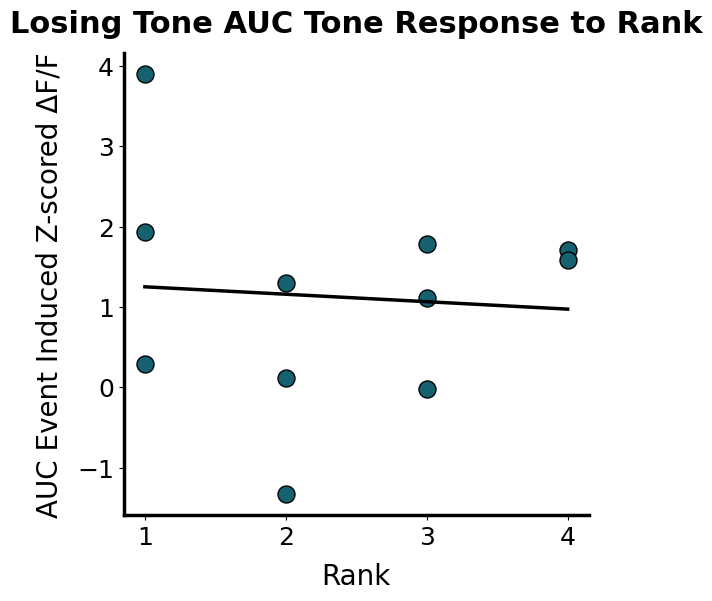

0
    Rank
12     1
16     1
24     1
20     1
21     2


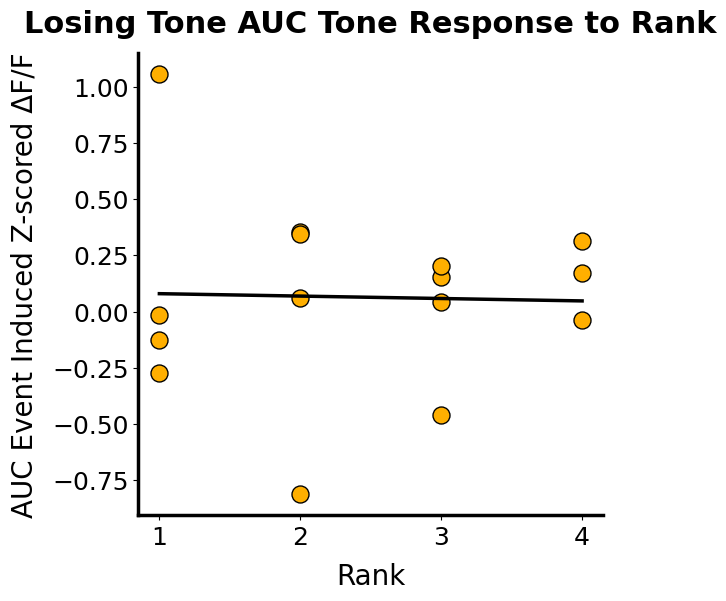

NAc: r=-0.076, p=0.823, n=11
mPFC: r=-0.029, p=0.919, n=15


In [ ]:
# Plots a scatter plot based on DA metric to tone and rank within cage. metric_name can be changed for other metrics
exp.scatter_dominance(directory_path1, df_win1, metric_name='Tone AUC', method='EI', condition="Winning")
exp.scatter_dominance(directory_path1, df_lose1, metric_name='Tone AUC', method='EI', condition="Losing")

## First Tone DA

In [ ]:
# Plots the DA metrics from the first tone as bar plots side by side
"""exp.plot_conditional(df_first_win1, df_first_lose1, method='', metric_name='AUC Mean', directory_path=directory_path8)
exp.plot_conditional(df_first_win1, df_first_lose1, method='', metric_name='Max Peak Mean', directory_path=directory_path8)
exp.plot_conditional(df_first_win1, df_first_lose1, method='', metric_name='Mean Z-score Mean', directory_path=directory_path8)
exp.plot_conditional(df_first_win1, df_first_lose1, method=' EI', metric_name='AUC Mean', directory_path=directory_path9)
exp.plot_conditional(df_first_win1, df_first_lose1, method=' EI', metric_name='Max Peak Mean', directory_path=directory_path9)
exp.plot_conditional(df_first_win1, df_first_lose1, method=' EI', metric_name='Mean Z-score Mean', directory_path=directory_path9)"""

"exp.plot_conditional(df_first_win1, df_first_lose1, method='', metric_name='AUC Mean', directory_path=directory_path8)\nexp.plot_conditional(df_first_win1, df_first_lose1, method='', metric_name='Max Peak Mean', directory_path=directory_path8)\nexp.plot_conditional(df_first_win1, df_first_lose1, method='', metric_name='Mean Z-score Mean', directory_path=directory_path8)\nexp.plot_conditional(df_first_win1, df_first_lose1, method=' EI', metric_name='AUC Mean', directory_path=directory_path9)\nexp.plot_conditional(df_first_win1, df_first_lose1, method=' EI', metric_name='Max Peak Mean', directory_path=directory_path9)\nexp.plot_conditional(df_first_win1, df_first_lose1, method=' EI', metric_name='Mean Z-score Mean', directory_path=directory_path9)"

In [ ]:
# Plots scatter plots for dominance using only the DA-response from the first tone.
"""exp.scatter_dominance(directory_path1, df_first_win1, metric_name='AUC', method=' EI', condition="Winning")
exp.scatter_dominance(directory_path1, df_first_lose1, metric_name='AUC', method=' EI', condition="Losing")
exp.scatter_dominance(directory_path1, df_first_win1, metric_name='Max Peak', method=' EI', condition="Winning")
exp.scatter_dominance(directory_path1, df_first_lose1, metric_name='Max Peak', method=' EI', condition="Losing")
exp.scatter_dominance(directory_path1, df_first_win1, 'Mean Z-score', method=' EI', condition='Winning')
exp.scatter_dominance(directory_path1, df_first_lose1, 'Mean Z-score', method=' EI', condition='Losing')"""

'exp.scatter_dominance(directory_path1, df_first_win1, metric_name=\'AUC\', method=\' EI\', condition="Winning")\nexp.scatter_dominance(directory_path1, df_first_lose1, metric_name=\'AUC\', method=\' EI\', condition="Losing")\nexp.scatter_dominance(directory_path1, df_first_win1, metric_name=\'Max Peak\', method=\' EI\', condition="Winning")\nexp.scatter_dominance(directory_path1, df_first_lose1, metric_name=\'Max Peak\', method=\' EI\', condition="Losing")\nexp.scatter_dominance(directory_path1, df_first_win1, \'Mean Z-score\', method=\' EI\', condition=\'Winning\')\nexp.scatter_dominance(directory_path1, df_first_lose1, \'Mean Z-score\', method=\' EI\', condition=\'Losing\')'